In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Part 2 of the project

The dataset used in this research comprises 366,995 data samples. It consists of 18 columns, each containing diverse information such as the fine number, time, initial report track, current report track, current report treatment status, article offense, code offense symbol, initial fine amount, identical number, violation category, gender, city of residence, city where the violation occurred, age, religion, religion group (Jew or Non-Jew), type of vehicle, and number of vehicles. The majority of the data is categorical, with categorical variables accounting for 72.2% of the dataset (excluding time and report number). 
The information was collected by the Israel Police over a period of five years, from January 1, 2016, to December 31, 2020, spanning a total of 1,827 days during which violations occurred.


The overarching goal of this part of the project, taking into account the preceding data analysis, is to explore the feasibility of building predictive models to address three specific research questions:

Research Question 1: Can a predictive model be developed to determine the offender's religion based on other data?

Research Question 2: Is it possible to create predictive models for determining the time of day by the type of article offense?

Research Question 3: Can predictive models be constructed to determine the article offense based on the category of the violation?

By leveraging data preprocessing techniques and employing classification models such as XGB Classifier and Logistic Regression, the project aims to uncover patterns, relationships, and predictive capabilities within the dataset. These predictive models hold the potential to enhance our understanding of religious affiliation, the timing of offenses, and the fine-grained categorization of violations. Ultimately, the project seeks to provide valuable insights into the intricate connections within the data, contributing to more accurate and efficient methods of classification and analysis.


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Data.xlsx - Our data that given by police.

In [3]:
df = pd.read_excel('D:\data.xlsx', index_col=0)
df.columns = ['Time', 'Initial report track', 'Current report trackage', 'Current report treatment status', 'Article offense',
             'Code offense symbol', 'Initial fine amount','Identical number', 'Category of the violation', 'Sex', 
             "City where the violation was occured", 'City of residence', "Religion", "Age", 'Religion group', 'Type of vehicle',
             "Number of vehicle"]

print("The number of examples in our data is ", len(df))
df.head(5)

The number of examples in our data is  366995


Time Initial report track Current report trackage  \
מספר דוח                                                                      
1111111111 2016-03-02 15:00:00           ברירת משפט              ברירת משפט   
1111111112 2016-04-16 04:15:00           ברירת משפט              ברירת משפט   
1111111113 2016-03-08 18:35:00           ברירת משפט              ברירת משפט   
1111111114 2016-03-15 15:10:00           ברירת משפט              ברירת משפט   
1111111115 2016-03-20 10:30:00           ברירת משפט              ברירת משפט   

           Current report treatment status  \
מספר דוח                                     
1111111111                  סגור עקב תשלום   
1111111112                  סגור עקב תשלום   
1111111113                  סגור עקב תשלום   
1111111114                  סגור עקב תשלום   
1111111115                  סגור עקב תשלום   

                                                       Article offense  \
מספר דוח                                                                 
1111111111                             אי ציות לתמרור 302 בצומת (עצור)   
1111111112                                        נהג ללא חגורת בטיחות   
1111111113  שימוש בטלפון בעת שהרכב נע שלא באמצעות מיקרופון המותקן ברכב   
1111111114                         סטייה מנתיב הנסיעה תוך הפרעה לתנועה   
1111111115                                           נהגת בחוסר זהירות   

            Code offense symbol  Initial fine amount  Identical number  \
מספר דוח                                                                 
1111111111                 6626                  250           1440473   
1111111112                 6702                  250           1564274   
1111111113                 6577                 1000           1369040   
1111111114                 5439                  250           1448260   
1111111115                 2429                  500           1449881   

           Category of the violation  Sex  \
מספר דוח                                    
1111111111           זכות קדימה לרכב  זכר   
1111111112       שימוש באמצעי בטיחות  זכר   
1111111113     אי נקיטת אמצעי זהירות  זכר   
1111111114             סטיות ונתיבים  זכר   
1111111115        נהיגה בחוסר זהירות  זכר   

           City where the violation was occured City of residence Religion  \
מספר דוח                                                                     
1111111111                                עפולה             נהריה    יהודי   
1111111112                                 חיפה          קרית אתא    יהודי   
1111111113                                 חיפה              עומר    יהודי   
1111111114                                 חיפה              חיפה   מוסלמי   
1111111115                                  עכו               עכו   מוסלמי   

              Age Religion group Type of vehicle  Number of vehicle  
מספר דוח                                                             
1111111111  30-33          יהודי            פרטי           11192092  
1111111112  24-26          יהודי            פרטי           11120937  
1111111113  27-29          יהודי            פרטי           11118790  
1111111114  34-43       לא יהודי          ציבורי           11333385  
1111111115  34-43       לא יהודי               -           11372714

We generate a pie chart to visualize the distribution of religious groups in a DataFrame (df) and displays the percentages of "Non Jews," "Jews," and "Unknown" categories.

Pie illustrates the breakdown of violators into Jews, Non-Jews, and unknown categories. In our dataset, the percentage of non-Jewish violators is 51.5%, exceeding the number of Jewish violators.

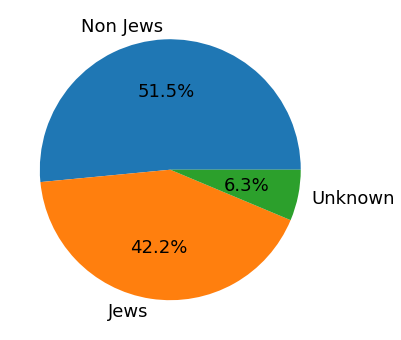

In [4]:
genderR = df["Religion group"].value_counts()

genderR.plot(kind = "pie", ylabel='', autopct='%1.1f%%', labels = ["Non Jews", "Jews", "Unknown"], figsize = (6, 6), fontsize = 18)
plt.show()

In this dataset, individuals are categorized into six religious groups: Muslim, Jews, Christians, Druze, Unknown, and Christian Arabs. The initial analysis of the data reveals that among the list of violators, Jews constitute 42.2% of the total. Muslims account for 40%, while Christians make up 8.6%. The remaining 9.2% includes Druze, Christian Arabs, and individuals categorized as "Unknown." The relationship between these religious groups is visually depicted in Figure below.

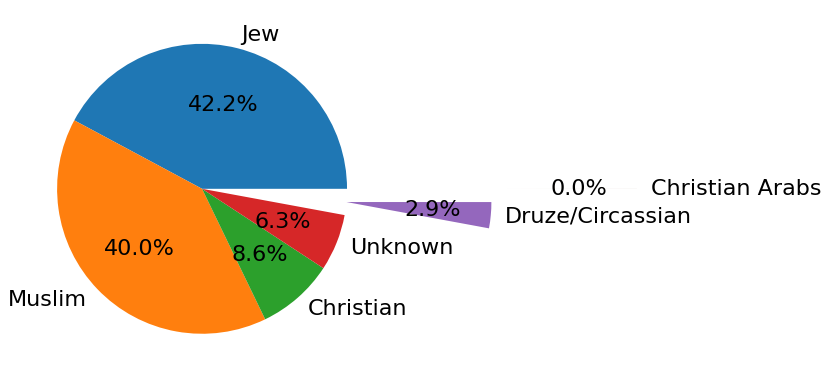

In [5]:
genderR = df["Religion"].value_counts()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 6), dpi=80)
genderR.plot(kind = "pie", ylabel='', autopct='%1.1f%%', labels = ["Jew", "Muslim", "Christian", "Unknown", "Druze/Circassian", "Christian Arabs"], explode = [0,0,0,0, 1, 2])
plt.show()

Visualize the distribution of geographic attributes or settlement descriptions within the DataFrame by creating a horizontal bar chart. It aims to provide a clear and intuitive representation of the counts of each unique value in the "תאור ישוב מלא" column. Name of settlements given in Hebrew.

As depicted in figure below, Haifa records the highest number of violations, with a total of 155,250 cases. Following closely is Nazareth with 65,521 violations, securing the second spot. Acre takes the third position with 38,321 reported violations.

In [6]:
def ReverseNames(array):
    array_new = [];
    for a in array:
        array_new.append(a[::-1])
    return array_new;
        

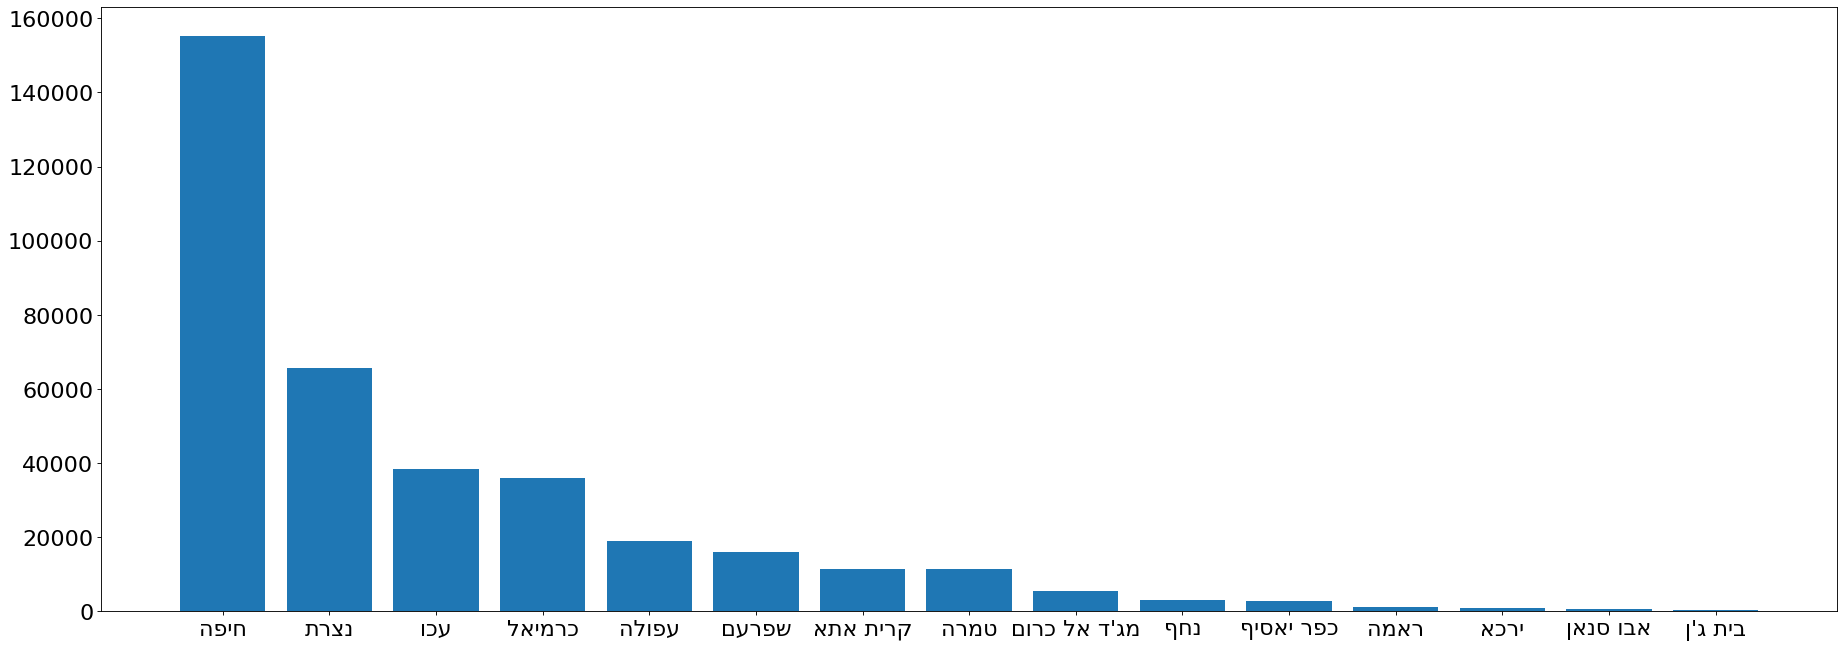

In [7]:
typeOfTransport = pd.DataFrame(df["City where the violation was occured"].value_counts())

plt.figure(figsize=(28,10), dpi=80)
plt.rcParams.update({'font.size': 20})
transport = typeOfTransport.index

transport_ivrit= ReverseNames(transport);
plt.bar(transport_ivrit, typeOfTransport["City where the violation was occured"].unique())
plt.show()

This function help us withvisualising the distribution of vehicle types within a dataset. Specifically, it focuses on distinguishing "Private" vehicles from other types of vehicles.

According to figure below, it can be observed that approximately 81% of all violations were committed in private cars. The remaining 29% of violations were committed using different types of vehicles.

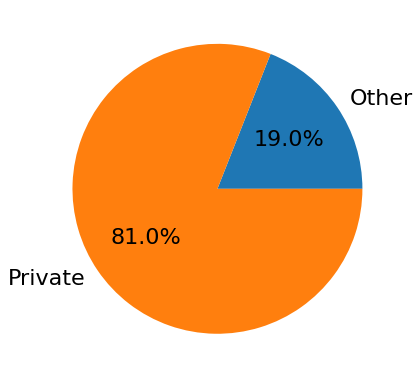

In [8]:
typeOfTransport = pd.DataFrame(df["Type of vehicle"].value_counts())
notPrivateTransport = typeOfTransport.loc[typeOfTransport.index != 'פרטי'].sum()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 6), dpi=80)
plt.pie([notPrivateTransport, typeOfTransport["Type of vehicle"][0]], labels = ["Other", "Private"], autopct='%1.1f%%')
plt.show()

In [9]:
def Residence(city):
    result=""
    north = (city=="חיפה" or city=="נצרת" or city=="עכו" or city=="עפולה" or city=="טמרה" or  city=="קרית אתא" or city=="כרמיאל" 
    or city=="שפרעם" or city=="נוף הגליל" or city=="מג'ד אל כרום" or  city=="קרית מוצקין" or city=="קרית ביאליק" or city=="קרית ים" 
    or city=="יפיע" or city=="נחף" or city=="נהריה" or city=="ג'דידה מכר" or city=="נשר" or city=="ריינה" or city=="טירת כרמל" 
    or city=="סח'נין" or city=="כפר כנא" or city=="אעבלין" or city=="כפר מנדא" or city=="עראבה" or city=="כפר יאסיף" 
    or city=="דייר אל אסד" or city=="עין מאהל" or city=="סלמה" or city=="חוסנייה" or city=="פקיעין" or city=="תל עדשים"
    or city=="כפר ביאליק" or city=="מגדים" or city=="מורן" or city=="כרם מהר''ל"  or city=="אליפלט" or city=="מעוז חיים"
    or city=="אבו סנאן" or city=="אכסאל" or city=="כאבול" or city=="מגדל העמק" or city=="עילוט" or city=="אום אל פחם"  
    or city=="ביענה" or city=="ירכא" or  city=="ראמה" or city=="משהד" or city=="שעב" or city=="עספיא" or city=="ביר אל מכסור" 
    or city=="יקנעם עילית" or city=="מעלות תרשיחא" or city=="מגאר" or city=="עתלית" or city=="קרית טבעון" or city=="חדרה" 
    or city=="דאלית אל כרמל" or  city=="טורעאן" or city=="דבוריה" or city=="מעלה עירון" or city=="בסמת טבעון" or city=="דייר חנא" 
    or city=="זרזיר" or city=="בית ג'ן" or city=="זכרון יעקב" or city=="טבריה" or city=="שבלי" or city=="כעביה טבאש חג'אג'רה"
    or city=="סאג'ור" or city=="מוקייבלה" or city=="מזרעה" or city=="רכסים" or  city=="פרדס חנה כרכור" or  city=="סולם שונם" 
    or city=="ג'וליס" or  city=="רמת ישי" or city=="צפת" or city=="כאוכב אבו אל היגא" or city=="פוריידיס" or  city=="כמאנה" 
    or city=="בועיינה נוג'יידאת" or city=="שלומי" or city=="כפר קרע" or city=="בית שאן" or city=="כפר ורדים" or city=="באקה אל ע'רביה" 
    or city=="אבטין" or city=="ערערה" or city=="כיסרא סומיע" or city=="עיילבון" or city=="יאנוח ג'ת" or city=="שייח' דנון" 
    or city=="אור עקיבא" or city=="נין" or city=="חריש" or city=="קרית שמונה" or  city=="בנימינה גבעת עדה" or city=="ג'יש" 
    or city=="נאעורה" or city=="טובא זנגריה" or city=="בסמ''ה" or city=="פסוטה" or city=="קיסריה" or city=="גן נר" or city=="חורפיש" 
    or city=="צנדלה" or  city=="עוזייר" or city=="כפר תבור" or  city=="כפר מיסר" or city=="טייבה ליד מולדת" or  city=="אחוזת ברק" 
    or city== "נופית" or city=="בוסתן הגליל" or city=="רומת היב" or  city=="גילון" or city=="מצפה אבי''ב" or city=="חצור הגלילית" 
    or city=="מג'דל שמס" or city=="עדי" or city=="ג'סר א זרקא" or city=="צורית" or city=="מעיליא" or city=="טמרה יזרעאל" 
    or city=="יובלים" or city=="טל אל" or city=="ח'ואלד" or city=="כמון" or city=="מנשית זבדה" or city=="אחיהוד" or city=="ראס עלי" 
    or city=="רקפת" or city=="לבון" or city=="ג'ת" or city=="שמשית" or city=="מורשת" or city=="גבע כרמל" or city=="עצמון שגב" 
    or city=="גבעת אלה" or city=="מכמנים" or city=="עראמשה" or city=="דחי" or  city=="אשחר" or city=="כפר חנניה"  
    or city=="שזור" or city=="חלוץ" or city=="קצרין" or  city=="לוטם" or city=="צרופה" or city=="מרחביה קיבוץ" or city=="שכניה" 
    or city=="ראש פינה" or city=="אמירים" or city=="שבי ציון" or city=="יסעור" or city=="עין אל אסד" or city=="בוקעתא" 
    or city=="קורנית" or city=="גשר הזיו" or city=="ראס אל עין" or city=="שורשים" or city=="רמת יוחנן" or city=="ערב אל נעים" 
    or city=="כפר כמא" or city=="עין איילה" or city=="רומאנה" or city=="תמרת" or city=="יודפת" or city=="כפר חסידים א'" 
    or city=="כפר ראש הנקרה" or city=="לוחמי הגיטאות" or city=="שפר" or city=="הושעיה" or city=="חוסן" or city=="יבנאל" 
    or city=="הסוללים" or city=="ציפורי" or city=="החותרים" or city=="עין יעקב" or city=="חבר" or city=="פרוד" or city=="יעד" 
    or city=="רגבה" or city=="עין המפרץ" or city=="גבעת אבני" or city=="ניר יפה" or city=="חזון" or city=="נווה זיו" or city=="אפק" 
    or city=="כברי" or city=="מעונה" or city=="כפר יחזקאל" or city=="שמרת" or city=="סער" or city=="אושה" or city=="יגור" 
    or city=="מיטב" or city=="אשרת" or city=="אילון" or city=="הררית" or city=="יקנעם" or city=="מרחביה מושב" or city=="רם און" 
    or city=="חמאם" or city=="יערה" or city=="מצובה" or city=="מנוף" or city=="אביטל" or city=="מדרך עוז" or city=="אלוני אבא"
    or city=="אלון הגליל" or city=="ספסופה" or city=="מסעדה" or city=="לימן" or city=="עבדון" or city=="מגדל"  
    or city=="מגן שאול" or city=="עין הוד" or city=="כפר יהושע" or city=="תובל" or city=="בלפוריה" or city=="עין כרמל"  
    or city=="כפר המכבי" or city=="כפר החורש" or city=="חרשים" or city=="דמיידה" or city=="אומן" or city=="עין העמק" 
    or city=="אדירים" or city=="אבטליון" or city=="דלתון" or city=="ברק" or city=="בר יוחאי" or city=="יפעת" or city=="כפר מסריק" 
    or city=="שדה יעקב" or city=="עמקה" or city=="דוב''ב" or city=="ע'ג'ר" or city=="חנתון" or city=="פוריה עילית" or city=="כליל" 
    or city=="חניתה" or city=="עין חוד" or city=="היוגב" or city=="קציר" or city=="נהלל" or city=="בית אורן" or city=="עברון" 
    or city=="מולדת" or city=="אליקים" or city=="כפר שמאי" or city=="בית השיטה" or city=="מלאה" or city=="מזרע" or city=="נתיב השיירה" 
    or city=="ריחאנייה" or city=="נס עמים" or city=="טפחות" or city=="מגידו" or city=="מנות" or city=="כפר קיש" or city=="סואעד"
    or city=="מצפה נטופה" or city=="שער העמקים" or city=="יסוד המעלה" or city=="הילה" or city=="עין דור" or city=="עלמה"
    or city=="פקיעין חדשה" or city=="גדיש" or city=="שריד" or city=="כפר ברוך" or city=="הזורע" or city=="רמת השופט" 
    or city=="רמת צבי" or city=="שדה נחום" or city=="עופר" or city=="גורן" or city=="רמות מנשה" or city=="מטולה" or city=="אביבים"
    or city=="הרדוף" or city=="כלנית" or city=="יאמון" or city=="גבת" or city=="אל ח'וואלד מערב" or city=="בית רימון" 
    or city=="ביריה" or city=="בית העמק" or city=="שומרה" or city=="פוריה נווה עובד" or city=="יחיעם" or city=="פרזון" or city=="פלך" 
    or city=="בית שערים" or city=="נחשולים" or city=="מעגן מיכאל" or city=="מירון" or city=="צוריאל" or city=="משמר העמק" 
    or city=="כפר חסידים ב'" or city=="הבונים" or city=="געתון" or city=="נטועה" or city=="גדעונה" or city=="עין קנייא" 
    or city=="בית חנניה" or city=="אדמית" or city=="גיתה" or city=="שדות ים" or city=="קדרים" or city=="לבנים" or city=="בן עמי"
    or city=="דברת" or city=="שדה אליעזר" or city=="רשפים" or city=="שדמות דבורה" or city=="בת שלמה" or city=="גיניגר"             
    or city=="כינרת מושבה" or city=="מחניים" or city=="מעיין צבי" or city=="חפצי בה" or city=="בית קשת" or city=="כורזים" 
    or city=="דבורה" or city=="ניר עציון" or city=="חיננית" or city=="רוויה" or city=="כפר גדעון" or city=="נווה ים" or city=="שתולה" 
    or city=="בני יהודה" or city=="עין חרוד מאוחד" or city=="עין השופט" or city=="בית יוסף" or city=="גזית" or city=="אלקוש"
    or city=="מייסר" or city=="כפר סאלד" or city=="חד נס" or city=="מסד" or city=="משמר הירדן" or city=="כרכום" or city=="מאור" 
    or city=="מנחמיה" or city=="דליה" or city=="שרונה" or city=="סאסא" or city=="תל יוסף" or city=="כחל" or city=="כרם בן זמרה" 
    or city=="צבעון" or city=="רמת דוד" or city=="בצת" or city=="שקד" or city=="שדי תרומות" or city=="שאר ישוב" or city=="אלונים" 
    or city=="אבן מנחם" or city=="גורנות הגליל" or city=="חולתה" or city=="דור" or city=="גבעת עוז" or city=="שדה נחמיה" 
    or city=="הזורעים" or city=="רחוב" or city=="אום אל קוטוף" or city=="גבעת ניל''י" or city=="אבירים" or  city=="מתת" 
    or city=="ירדנה" or city=="נורית" or city=="ניר דוד" or city=="אילניה" or city=="זרעית" or city=="עמיעד" or city=="גבע" 
    or city=="אשבל" or city=="עין חרוד איחוד" or city=="בית אלפא" or city=="רמות נפתלי" or city=="אלמגור" or city=="חספין" 
    or city=="לבנים" or city=="קלע" or city=="גן השומרון" or city=="ארבל" or city=="כפר בלום" or city=="ברעם" or city=="תל תאומים" 
    or city=="כפר הנשיא" or city=="כפר זיתים" or city=="מעלה גלבוע" or city=="בית הלל" or city=="נווה אור" or city=="נאות מרדכי" 
    or city=="כפר גלים" or city=="יעל" or city=="אור הגנוז" or city=="פוריה כפר עבודה" or city=="אמנון" or city=="גינוסר"  
    or city=="מרגליות" or city=="זבאבידה" or city=="אלי עד" or city=="בית זרע" or city=="אבו רביעה" or city=="עמוקה" or city=="יובל" 
    or city=="מירב" or city=="יפתח" or city=="חמדיה" or city=="יזרעאל" or city=="איילת השחר" or city=="מעיין ברוך"
    or city=="אבני איתן" or city=="קבאטיה" or city=="ג'ודידה" or city=="יעבד" or city=="עין גב" or city=="עמיקם" or city=="גבעת יואב"
    or city=="דן" or city=="קדיתא" or city=="אל רום" or city=="מבוא דותן" or city=="יראון" or city=="נאות גולן" or city=="שניר" 
    or city=="אלומות" or city=="מענית" or city=="ריחן" or city=="להבות הבשן" or city=="תלמי אלעזר" or city=="רביד"  
    or city=="מלכיה" or city=="שער הגולן" or city=="מעלה גמלא" or city=="טירת צבי" or city=="מצפה אילן" or city=="חוקוק" 
    or city=="דישון" or city=="בית לחם הגלילית" or city=="שדמות מחולה" or city=="שדה אילן" or city=="קשת"
    or city=="דגניה ב'" or city=="דגניה א'" or city=="גונן" or city=="אפיקים" or city=="מסדה" or city=="עראנה" or city=="נוב" 
    or city=="פקועה" or city=="מחולה" or city=="גן שמואל" or city=="קדמת צבי" or city=="אביאל" or city=="שילה"  
    or city=="מית'לון" or city=="מסילות" or city=="כפר פינס" or city=="כפר רופין" or city=="אניעם" or city=="מרום גולן" or city=="מנרה" 
    or city=="משמרות" or city=="מבוא חמה" or city=="כפר גלעדי" or city=="כינרת קבוצה" or city=="רמות" 
    or city=="אשדות יעקב איחוד" or city=="כישור" or city=="רמת מגשימים" or city=="עמיר" or city=="חברון" 
    or city=="כמאנה מזרח" or city=="שעל" or city=="שלוחות" or city=="שמיר" or city=="הגושרים" or city=="לפידות" or city=="ברקאי" 
    or city=="כפר חרוב" or city=="נטור" or city=="גלעד" or city=="נווה איתן" or city=="מי עמי" or city=="מחנה יהודית" 
    or city=="תל קציר" or city=="עין זיוון" or city=="כפר חיטים" or city=="עין עירון" or city=="גדות" or city=="דפנה" or city=="כנף" 
    or city=="רומאנה ממזרח לאום אל פחם" or city=="שדה אליהו" or city=="משגב עם" or city=="מאיר שפיה" or city=="מכחול" 
    or city=="עין הנצי''ב" or city=="לביא" or city=="כפר גליקסון" or city=="אל עריאן" or city=="גשור" or city=="אשדות יעקב מאוחד"
    or city=="מצפה" or city=="אורטל" or city=="בית זיד" or city=="אודם" or city=="מצר" or city=="מיצר" or city=="אל אסד" 
    or city=="אלוני יצחק" or city=="טנא" or city=="מעגן" or city=="גשר"or city=="כפר הנוער הדתי" or city=="נווה אטי''ב" 
    or city=="עין שמר" or city=="חוג'ייראת" or city=="הודיות מוסד חינוכי" or city=="חפץ חיים" or city=="אלוני הבשן")
    
    south = (city=="אשקלון" or  city=="אילת" or  city=="אשדוד" or city=="באר שבע" or city=="רהט" or city=="קרית גת"  
     or city=="שדרות" or city=="דימונה" or city=="אופקים" or city=="ערד" or city=="קרית מלאכי" or city=="לקיה" or city=="חורה" 
     or city=="ערערה בנגב" or city=="תל שבע" or city=="מסעודין אל עזאזמה" or city=="שגב שלום" or city=="כסיפה" or city=="אעצם" 
     or city=="עומר" or city=="ירוחם" or city=="מיתר" or city=="אבו רוקייק" or city=="להבים" or city=="יד בנימין" or city=="מצפה רמון"
     or city=="מבועים" or city=="קסר א סיר" or city=="מדרשת בן גוריון" or city=="עמנואל" or city=="תראבין א צאנה שבט"
     or city=="יטא יוטה" or city=="קרית ארבע" or city=="אבו ג'ווייעד" or city=="הוואשלה" or city=="מפלסים" or city=="יונתן" 
     or city=="רגבים" or city=="אבו קורינאת" or city=="אבו כף אום בטין" or city=="קטורה" or city=="נוקדים" or city=="בת הדר"
     or city=="אבו תלול" or city=="מרכז שפירא" or city=="ברור חיל" or city=="פארן" or city=="ג'אבליה נזלה" or city=="צופר" 
     or city=="תראבין א צאנה" or city=="ברכיה" or city=="א סייד שבט" or city=="אבו קרינאת" or city=="שדה יואב" or city=="א שויוח"
     or city=="דריג'את" or city=="הוזייל" or city=="מולדה" or city=="אטרש" or city=="רביבים" or city=="איבים" or city=="אשלים" 
     or city=="סוסיה" or city=="נחל עוז" or city=="זיקים" or city=="שחר" or city=="באר טוביה" or city=="שוקדה" or city=="חאן יונס"
     or city=="עין הבשור" or city=="יתד" or city=="רבדים" or city=="תלמים" or city=="נווה שלום" or city=="קבועה"
     or city=="באר אורה" or city=="א סייד" or city=="יד נתן" or city=="עזה" or city=="שתולים" or city=="דבירה" or city=="נתיבות"
     or city=="אביגדור" or city=="ביצרון" or city=="כפר ורבורג" or city=="כפר אביב" or city=="סופה" or city=="נווה מבטח" 
     or city=="ינון" or city=="שחרות" or city=="נועם" or city=="שלווה" or city=="ניצנה כפר נוער" or city=="כיסופים"
     or city=="תלמי ביל''ו" or city=="זמרת" or city=="בית גוברין" or city=="שדה ניצן" or city=="ניצן ב'" or city=="קוואעין"
     or city=="פדויים" or city=="ניצנים" or city=="ניר משה" or city=="ביר הדאג'" or city=="נאות הכיכר" or city=="חצור אשדוד" 
     or city=="בית עזרא" or city=="יבול" or city=="עמיעוז" or city=="כפר אחים" or city=="ארז" or city=="תקומה" or city=="תפרח" 
     or city=="נגבה" or city=="בארי" or city=="רוחמה" or city=="משמר הנגב" or city=="גבעות בר" or city=="תלמי יפה" or city=="קלחים"
     or city=="סעד" or city=="צוקים" or city=="חצבה" or city=="קודייראת א צאנה" or city=="יד מרדכי" or city=="ניצן" or city=="אילות" 
     or city=="מבקיעים" or city=="דורות" or city=="שדה עוזיהו" or city=="מגן" or city=="ניר עם" or city=="יטבתה" or city=="מבטחים" 
     or city=="משגב דב" or city=="עין צורים" or city=="עידן" or city=="ניר ישראל" or city=="כפר עזה" or city=="איתן" 
     or city=="מחנה יפה" or city=="רעים" or city=="חלץ" or city=="שדה בוקר" or city=="ניצני סיני" or city=="שדה דוד" 
     or city=="בית הגדי" or city=="ברוש" or city=="שקף" or city=="שובל" or city=="שדמה" or city=="תושיה" or city=="תדהר" 
     or city=="ניר יצחק" or city=="אור הנר" or city=="זרועה" or city=="כרמיה" or city=="גן הדרום" or city=="הר עמשא" or city=="זרחיה" 
     or city=="חולית" or city=="גיאה" or city=="נהורה" or city=="משען" or city=="ורדון" or city=="לכיש" or city=="גילת" 
     or city=="מחנה טלי" or city=="ניר ח''ן" or city=="יכיני" or city=="זבדיאל" or city=="מחנה יתיר" or city=="אבשלום" 
     or city=="מחנה יוכבד" or city=="גבעולים" or city=="ניר עקיבא" or city=="עין יהב" or city=="ישע" or city=="עין גדי" or city=="מישר" 
     or city=="עתניאל" or city=="אל עזי" or city=="אורות" or city=="אביעזר" or city=="טללים" or city=="רפיח" or city=="צוחר" 
     or city=="אשבול" or city=="כפר מימון" or city=="פרי גן" or city=="מסלול" or city=="חצב" or city=="כפר הרי''ף" or city=="שרשרת" 
     or city=="אורים" or city=="אבו עבדון" or city=="עין השלושה" or city=="נווה" or city=="שדה צבי" or city=="כרם יבנה" or city=="גבעתי" 
     or city=="נטע" or city=="אליפז" or city=="בית ניר" or city=="מנוחה" or city=="אוהד" or city=="נבטים" or city=="אבו עמאר"
     or city=="ג'אבליה  נזלה")
    
    center = (city=="תל אביב יפו" or city=="בת ים" or city=="טייבה" or  city=="נתניה" or city=="רמת גן" or city=="ראשון לציון" 
      or city=="פתח תקווה" or city=="הרצליה" or city=="רעננה" or city=="בני ברק" or city=="לוד" or  city=="חולון" 
      or city=="כפר סבא" or city=="גבעתיים" or  city=="רחובות" or  city == "ראש העין" or city == "רמת השרון" 
      or city=="הוד השרון" or city=="טירה" or city=="רמלה" or city=="כפר יונה" or city=="מודיעין מכבים רעות" or city=="כפר קאסם" 
      or city=="קלנסווה" or city=="יבנה" or city=="קדימה צורן" or city=="נס ציונה" or city=="גבעת שמואל" or city=="זמר" 
      or city=="באר יעקב" or city=="קרית אונו" or city=="אבן יהודה" or city=="תל מונד" or city=="יהוד מונוסון"  
      or city=="פרדסיה" or city=="צביה" or city=="ג'לג'וליה" or city=="גדרה" or city=="גן יבנה" or city=="אלעד" 
      or city=="גני תקווה" or city=="מודיעין עילית" or city=="אזור" or city=="שוהם" or city=="אליכין" 
      or city=="מזכרת בתיה" or city=="כוכב יאיר" or city=="אלפי מנשה" or city=="אורנית" or city=="בת חפר" or city=="סביון" 
      or city=="קרית עקרון" or city=="כפר ויתקין" or city=="שערי תקווה" or city=="קרני שומרון" or city=="בני עי''ש" 
      or city=="מכמורת" or city=="אור יהודה" or city=="אומץ" or city=="כפר ידידיה"
      or city=="בית יצחק שער חפר" or city=="כפר ברא" or city=="בית אריה" or city=="צור יצחק" or city=="בית דגן" or city=="אביחיל" 
      or city=="כפר שמריהו" or city=="קדומים" or city=="צור משה" or city=="חופית" or city=="שער אפרים" 
      or city=="נווה ימין" or city=="עין ורד" or city=="סלעית" or city=="צופין" or city=="נורדיה" or city=="בני דרור" 
      or city=="בית הלוי" or city=="חרב לאת" or city=="רשפון" or city=="בארותיים" or city=="בצרה" 
      or city=="אודים" or city=="גני מודיעין" or city=="מתן" or city=="כפר הרא''ה" or city=="בית חרות" 
      or city=="חניאל" or city=="גבעת חיים איחוד" or city=="עין שריד" or city=="כפר הס" or city=="כרמי יוסף" or city=="להבות חביבה" 
      or city=="תל יצחק" or city=="ניצני עוז" or city=="מעברות" or city=="עולש" or city=="כפר מונש" or city=="אחיטוב" 
      or city=="אלישמע" or city=="שדה ורבורג" or city=="עלי" or city=="נירית" or city=="נעלה" or city=="גבעת חיים מאוחד" 
      or city=="ברכה" or city=="חיבת ציון" or city=="זיתן" or city=="בן שמן" or city=="מגל" or city=="כפר יעבץ" or city=="חרות" 
      or city=="יד חנה" or city=="נווה ירק" or city=="אבני חפץ" or city=="צפריה" or city=="ירחיב" or city=="כפר חב''ד" 
      or city=="בקוע" or city=="בניה" or city=="ינוב" or city=="מקווה ישראל" or city=="מעלה אפרים" or city=="שדי חמד"
      or city=="בני ציון" or city=="הדר עם" or city=="צור נתן" or city=="נען" or city=="ברקת" or city=="כפר תפוח" or city=="טלמון" 
      or city=="עזריאל" or city=="טול כרם" or city=="מעש" or city=="בית צבי" or city=="בית חורון" or city=="ישרש"  
      or city=="בת חן" or city=="כפר חיים" or city=="גן יאשיה" or city=="רמות השבים" or city=="נחלים" or city=="לוזית"  
      or city=="שושנת העמקים" or city=="חגלה" or city=="גבעת שפירא" or city=="טל שחר" or city=="כפר הנגיד" or city=="צלפון" 
      or city=="שפיים" or city=="בית ינאי" or city=="שריגים" or city=="פלמחים" or city=="גני יוחנן" or city=="בני ראם" or city=="יגל" 
      or city=="אייל" or city=="תרום" or city=="מסילת ציון" or city=="יקום" or city=="חשמונאים" or city=="נוף איילון"  
      or city=="עגור" or city=="גאולים" or city=="לפיד" or city=="גנות הדר" or city=="חבצלת השרון" or city=="מבוא ביתר" 
      or city=="בית חשמונאי" or city=="עשרת" or city=="עזריה" or city=="געש" or city=="חורשים" or city=="פורת" or city=="קדרון" 
      or city=="בית נחמיה" or city=="כפר נטר" or city=="המעפיל" or city=="יד רמב''ם" or city=="מוצא עילית" or city=="גליל ים" 
      or city=="בורגתה" or city=="אמונים" or city=="ביתן אהרן" or city=="צופית" or city=="צוקי ים" or city=="תלמי יחיאל" 
      or city=="בית יהושע" or city=="בית עריף" or city=="נטף" or city=="חגור" or city=="עזריקם" or city=="משמרת"  
      or city=="ניל''י" or city=="כפר שמואל" or city=="אחיעזר" or city=="אלישיב" or city=="בחן" or city=="העוגן" or city=="בית חנן" 
      or city=="גאולי תימן" or city=="גבעת ברנר" or city=="כפר טרומן" or city=="נופך" or city=="חדיד" or city=="משמר השרון" 
      or city=="גמזו" or city=="כפר סירקין" or city=="יציץ" or city=="כפר רות" or city=="אלומה" or city=="ערוגות" or city=="תימורים" 
      or city=="נחשון" or city=="חמד" or city=="קטנה" or city=="תנובות" or city=="כפר בן נון" or city=="גנות" or city=="מחנה הילה" 
      or city=="מגשימים" or city=="גאליה" or city=="בני עטרות" or city=="בית עובד" or city=="נתיב הל''ה" or city=="נטעים" 
      or city=="גן חיים" or city=="ארסוף" or city=="ירקונה" or city=="שעלבים" or city=="עזר" or city=="ארגמן" or city=="כפר דניאל" 
      or city=="רמות מאיר" or city=="מחנה תל נוף" or city=="גבעת ח''ן" or city=="בית חלקיה" or city=="חלמיש" or city=="יסודות" 
      or city=="פתחיה" or city=="ניר צבי" or city=="כפר אוריה" or city=="יעף" or city=="מצליח" or city=="שואבה" or city=="מטע"
      or city=="שדה יצחק" or city=="כפר מל''ל" or city=="גינתון" or city=="גבעת כ''ח" or city=="אירתאח" or city=="נחשונים" 
      or city=="בית ברל" or city=="קרית ענבים" or city=="סתריה" or city=="רינתיה" or city=="בן זכאי" or city=="משמר דוד" 
      or city=="גני הדר" or city=="זכריה" or city=="נעמי" or city=="שלומית" or city=="רמת הכובש" or city=="מבואות ים"
      or city=="חרוצים" or city=="פדיה" or city=="שילת" or city=="נצר חזני" or city=="אשתאול" or city=="קבוצת יבנה" or city=="גיזו" 
      or city=="מזור" or city=="גת" or city=="בן שמן כפר נוער" or city=="בית עוזיאל" or city=="נווה מיכאל" or city=="אירוס" 
      or city=="חולדה" or city=="עדנים" or city=="ניר אליהו" or city=="נחושה" or city=="גבעת השלושה" or city=="רמת רזיאל" 
      or city=="גני עם" or city=="ניר גלים" or city=="קוממיות" or city=="עינת" or city=="משמר איילון" or city=="משמר השבעה" 
      or city=="תעוז" or city=="בית רבן" or city=="בית גמליאל" or city=="גן שלמה" or city=="עין החורש" or city=="בית מאיר" 
      or city=="מעגלים")
    
    west = (city=="ירושלים" or city=="בית שמש" or city=="מבשרת ציון" or city=="ביתר עילית" or city=="גבעת זאב" or city=="מעלה אדומים" 
     or city=="אבו גוש" or  city=="צור הדסה" or city=="אפרת" or city=="עין ראפה" or city=="כוכב השחר" or city=="עין נקובא" 
     or city=="אלון שבות" or city=="עלי זהב" or city=="כפר אדומים" or city=="עפרה" or city=="נס הרים" or city=="אלקנה" 
     or city=="תקוע" or city=="גבע בנימין" or city=="אלעזר" or city=="יריחו" or city=="ורד יריחו" or city=="בית לחם" 
     or city=="רימונים" or city=="בת עין" or city=="ג'לבון" or city=="קרית יערים" or city=="שכם" or city=="גלגל" or city=="מתתיהו" 
     or city=="גיתית" or city=="הר אדר" or city=="אריאל" or city=="קדר" or city=="אלון מורה" or city=="ראבא" or city=="כוכב יעקב"
     or city=="בית פוריכ" or city=="ג'בע" or city=="בית אל" or city=="בית זית" or city=="כפר האורנים" or city=="א ראם"
     or city=="אלעיזריה" or city=="רמאללה" or city=="בר גיורא" or city=="אל מוע'ייר" or city=="בית עווא" or city=="רבבה"
     or city=="סילת אל ח'רית'יה" or city=="ג'נין" or city=="דיר אבו דעיף" or city=="פצאל" or city=="רחלים" or city=="סיריס"
     or city=="חמרה" or city=="נווה דניאל" or city=="פסגות" or city=="חרמש" or city=="מגדלים" or city=="אום א תות"
     or city=="דולב" or city=="כיפל חארת" or city=="עין אל בידא" or city=="חוסאן" or city=="גבעון החדשה"
     or city=="הר גילה" or city=="עג'ה" or city=="רותם" or city=="קרית נטפים" or city=="שורש" or city=="קליה"
     or city=="עראבה ליד ג'נין" or city=="בקעות" or city=="תלם" or city=="מצפה יריחו" or city=="צרעה" or city=="ענב" 
     or city=="סיעיר" or city=="יקיר" or city=="ג'למה" or city=="סאנור" or city=="עץ אפרים" or city=="עוריף" or city=="נופים"
     or city=="רועי" or city=="ברקן" or city=="תומר" or city=="אורה" or city=="יפית" or city=="נתיב הגדוד" or city=="קלקיליה" 
     or city=="מירכה" or city=="חמדת" or city=="מזרעה אל קיבליה" or city=="עקבה בשומרון" or city=="כפר ראעי" or city=="טובאס"
     or city=="דיר בלוט" or city=="מצפה שלם" or city=="עאנין" or city=="ברוכין" or city=="בורוקין" or city=="רנתיס" or city=="אל ערוב"
     or city=="פסאיל" or city=="סילואד" or city=="ברדלה" or city=="איתמר" or city=="אל בירה" or city=="דיר ע'זאלה"
     or city=="בורקין" or city=="ביר זית" or city=="חרבת ראס עטיה" or city=="עלמון" or city=="עטרת" or city=="גפן" 
     or city=="מעלה לבונה" or city=="מבוא חורון" or city=="מרג' נעג'ה" or city=="האשימיה" or city=="ענאתא" 
     or city=="אידנא" or city=="ייט''ב" or city=="צובה" or city=="רפידא" or city=="אספר" or city=="ג'לקמוס" or city=="חלחול" 
     or city=="אבנת" or city=="נחליאל" or city=="חרבת עבא" or city=="מכורה" or city=="סוריף" or city=="ביתא א תחתא" 
     or city=="דהיישה מחנה פליטים" or city=="זובובא" or city=="כפר דאן" or city=="פרעה ג'יפטליק" or city=="אלמוג" or city=="כפר ניעמה" 
     or city=="טמון" or city=="קפין" or city=="סמוע" or city=="ח'ירבת א טייבה" or city=="בית דג'ן- שומרון" 
     or city=="עקאבת ג'בר מחנה פליטים" or city=="ערקה" or city=="עקרבה" or city=="בני נעים" or city=="פרעון" or city=="ח'ראס" 
     or city=="בית אומר" or city=="שבי שומרון" or city=="יצהר")
    
    if north:
        result="north"
    elif south:
        result="south"
    elif center:
        result="center"
    elif west:
        result="west"
    else:
        result="unknown"
    return result

In [10]:
lst=[]
for index, row in df.iterrows():
    lst.append(Residence(row["City of residence"]));

In [11]:
df["Area"]=pd.Series(lst).values

Figure bellow illustrates that the majority of violators, amounting to 91.04%, reside in the northern region where the crimes were committed. It is worth noting that all crimes in the dataset were exclusively committed in the northern area. the majority of violators, amounting to 91.04%, reside in the northern region where the crimes were committed. It is worth noting that all crimes in the dataset were exclusively committed in the northern area.

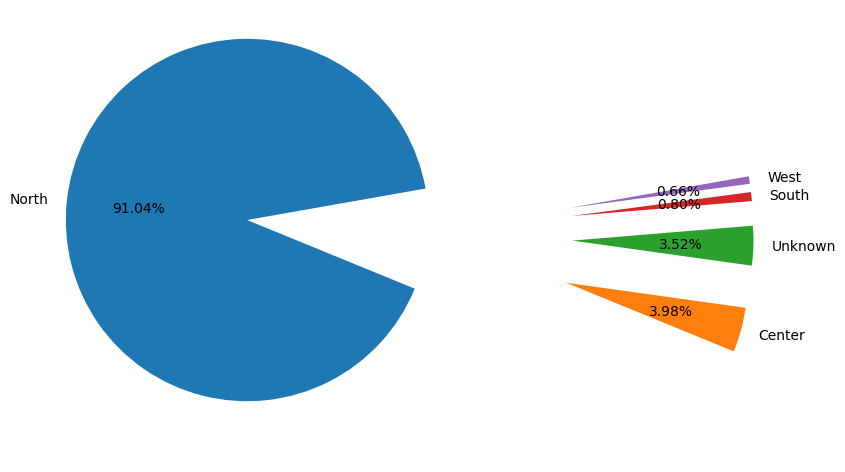

In [12]:
amountResidents=df["Area"].value_counts()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(amountResidents, labels = ['North', 'Center', 'Unknown', 'South', 'West'], autopct='%1.2f%%', startangle=10, 
        explode=[0.8, 1, 1,1, 1]) 
plt.show()

Figure below depicts the distribution of violators across different age groups. The largest percentage of violators, amounting to 21.01%, falls within the age range of 34-43 years. The second largest category consists of offenders aged 44-53, accounting for 15.74% of the total. The third largest category encompasses individuals aged 54-63, representing 10.77% of the violators. This analysis reveals that nearly half of the offenders fall within the age range of 34 to 63 years.

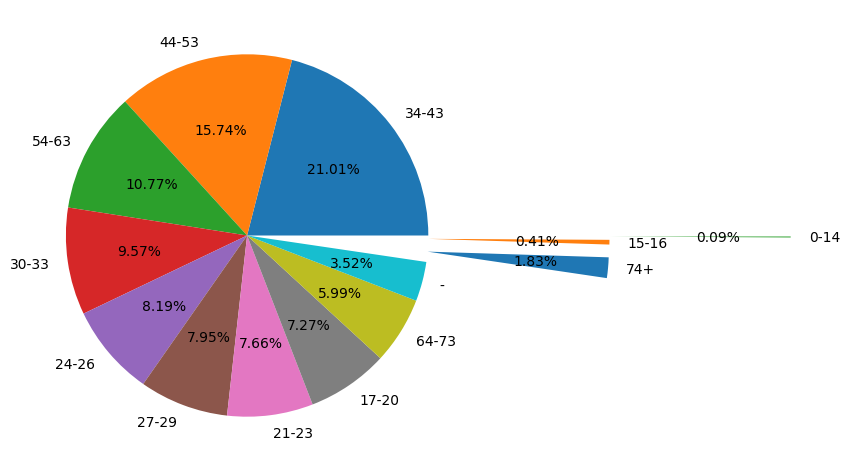

In [13]:
agePeople=df["Age"].value_counts()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(agePeople, labels = ['34-43', '44-53', '54-63', '30-33', '24-26', '27-29', '21-23', '17-20','64-73', '-', '74+', '15-16', '0-14'], autopct='%1.2f%%', explode=[0, 0, 0,0, 0,0,0,0,0,0,1,1,2]) 
plt.show()

The next stage involves examining the frequency of violations in each age group, taking into account the gender of the offenders. Figure below illustrates that across nearly all age categories, women committed fewer violations than men by a factor of less than 2. The age group 34-43 encompasses the highest number of violators for both women and men. However, a noteworthy disparity is evident in the 17-20 age category, where men have significantly more violations than women (85% of violations in this age group were committed by men, while women accounted for only 15%).

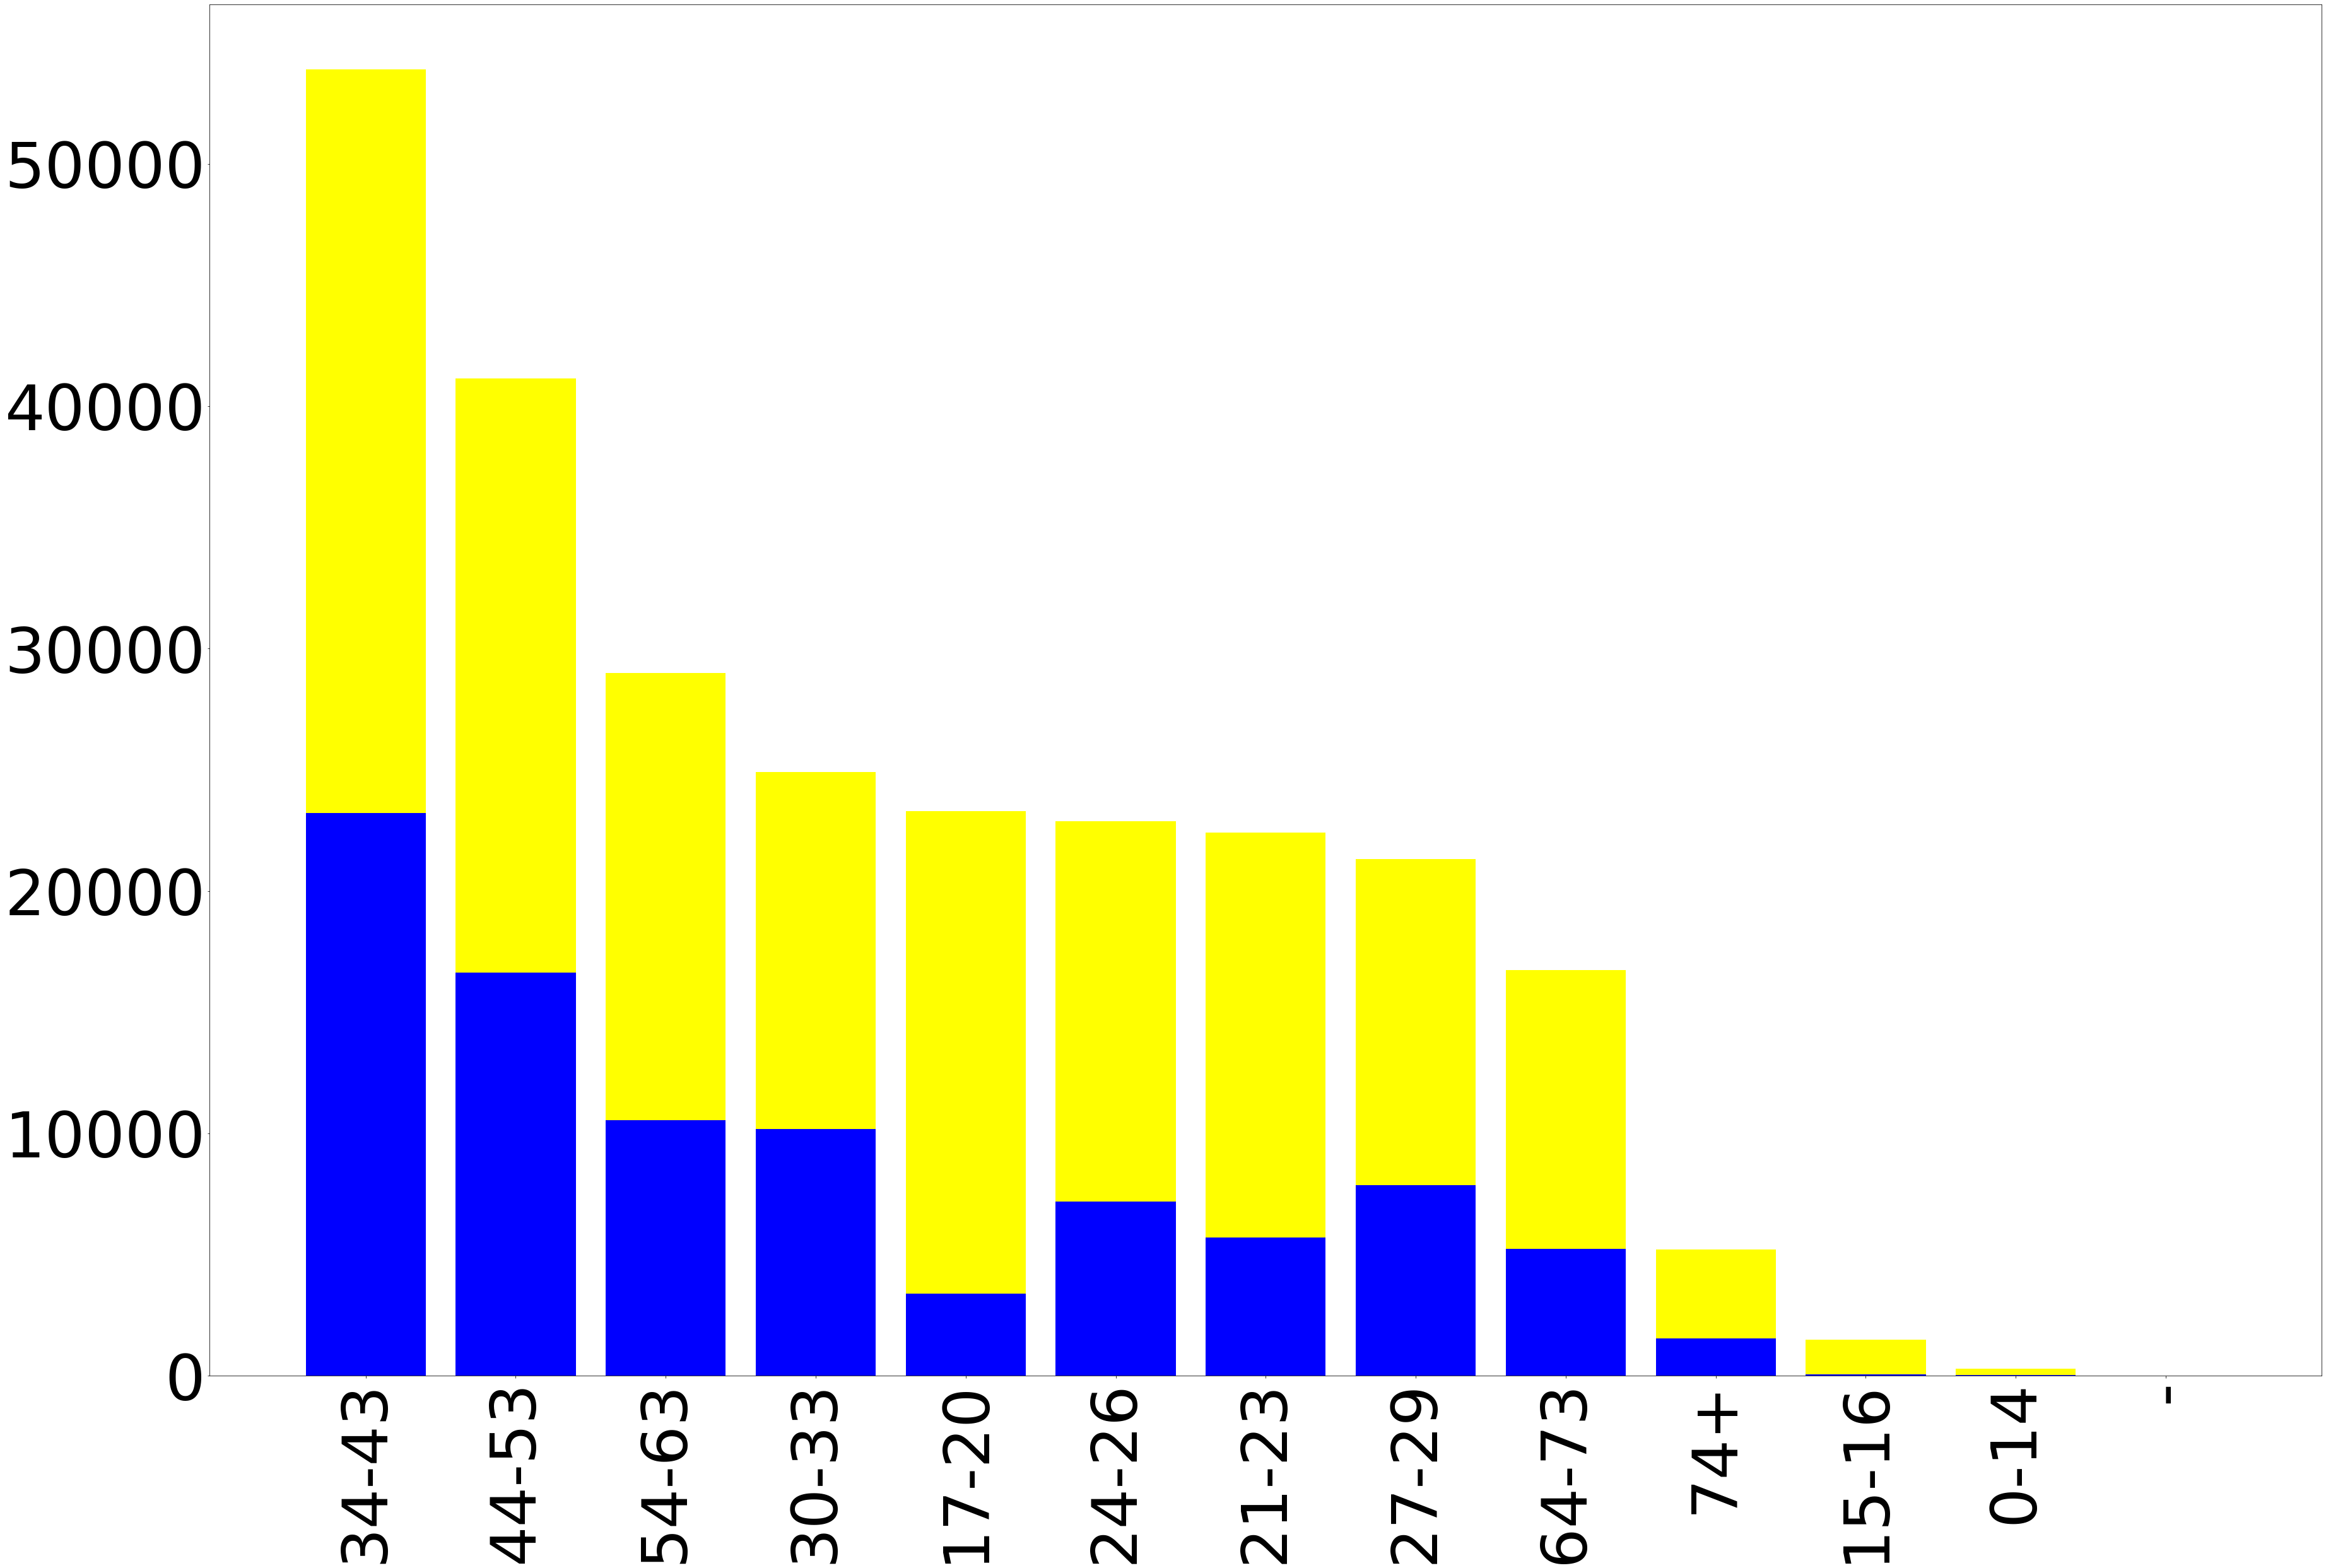

In [28]:
ageMan = df.loc[df["Sex"]=="זכר"]["Age"].value_counts()
ageWoman = df.loc[df["Sex"]=="נקבה"]["Age"].value_counts()
plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 150})
plt.bar(ageMan.index, ageMan.values, color="yellow")
plt.bar(ageWoman.index, ageWoman.values, color="blue")
plt.show()

Two pie charts below illustrates the distribution of violations across different age groups, specifically for both men and women. It reveals that the highest number of violations occurs within the age category of 34-43 for both genders. The second largest category, observed in both men and women, corresponds to the age range of 44-53. This finding highlights a similar pattern of age distribution for violations among both genders.

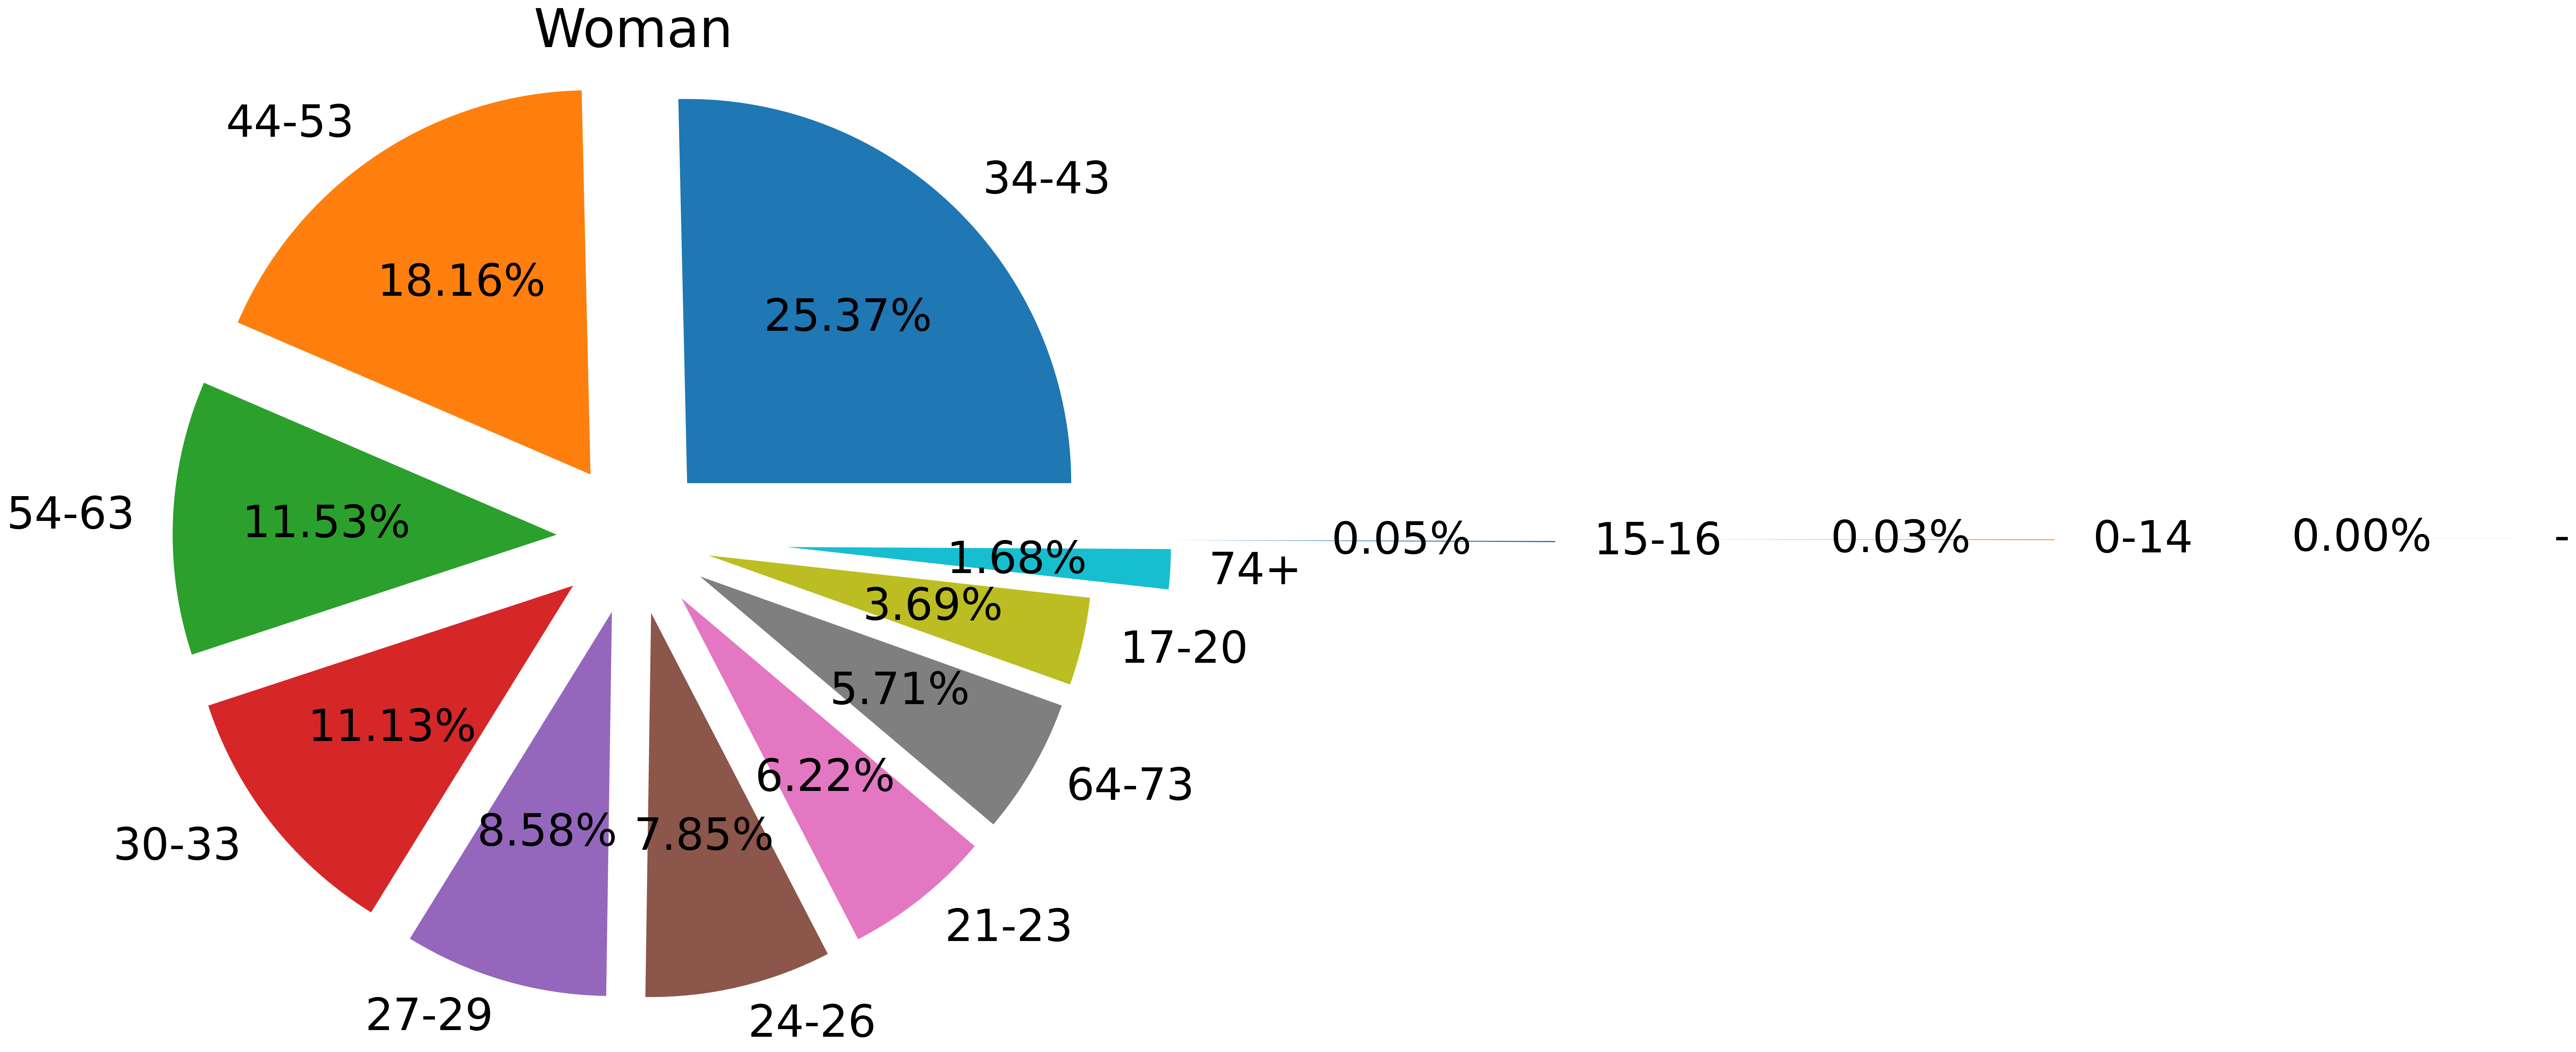

In [15]:
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(28, 20), dpi=200)
plt.title("Woman")
plt.pie(ageWoman, labels = ageWoman.index, autopct='%1.2f%%',explode=[0.2, 0.2, 0.2,0.2, 0.2,0.2,0.2,0.2,0.2,0.4,1.4,2.7, 3.9]) 
plt.show()

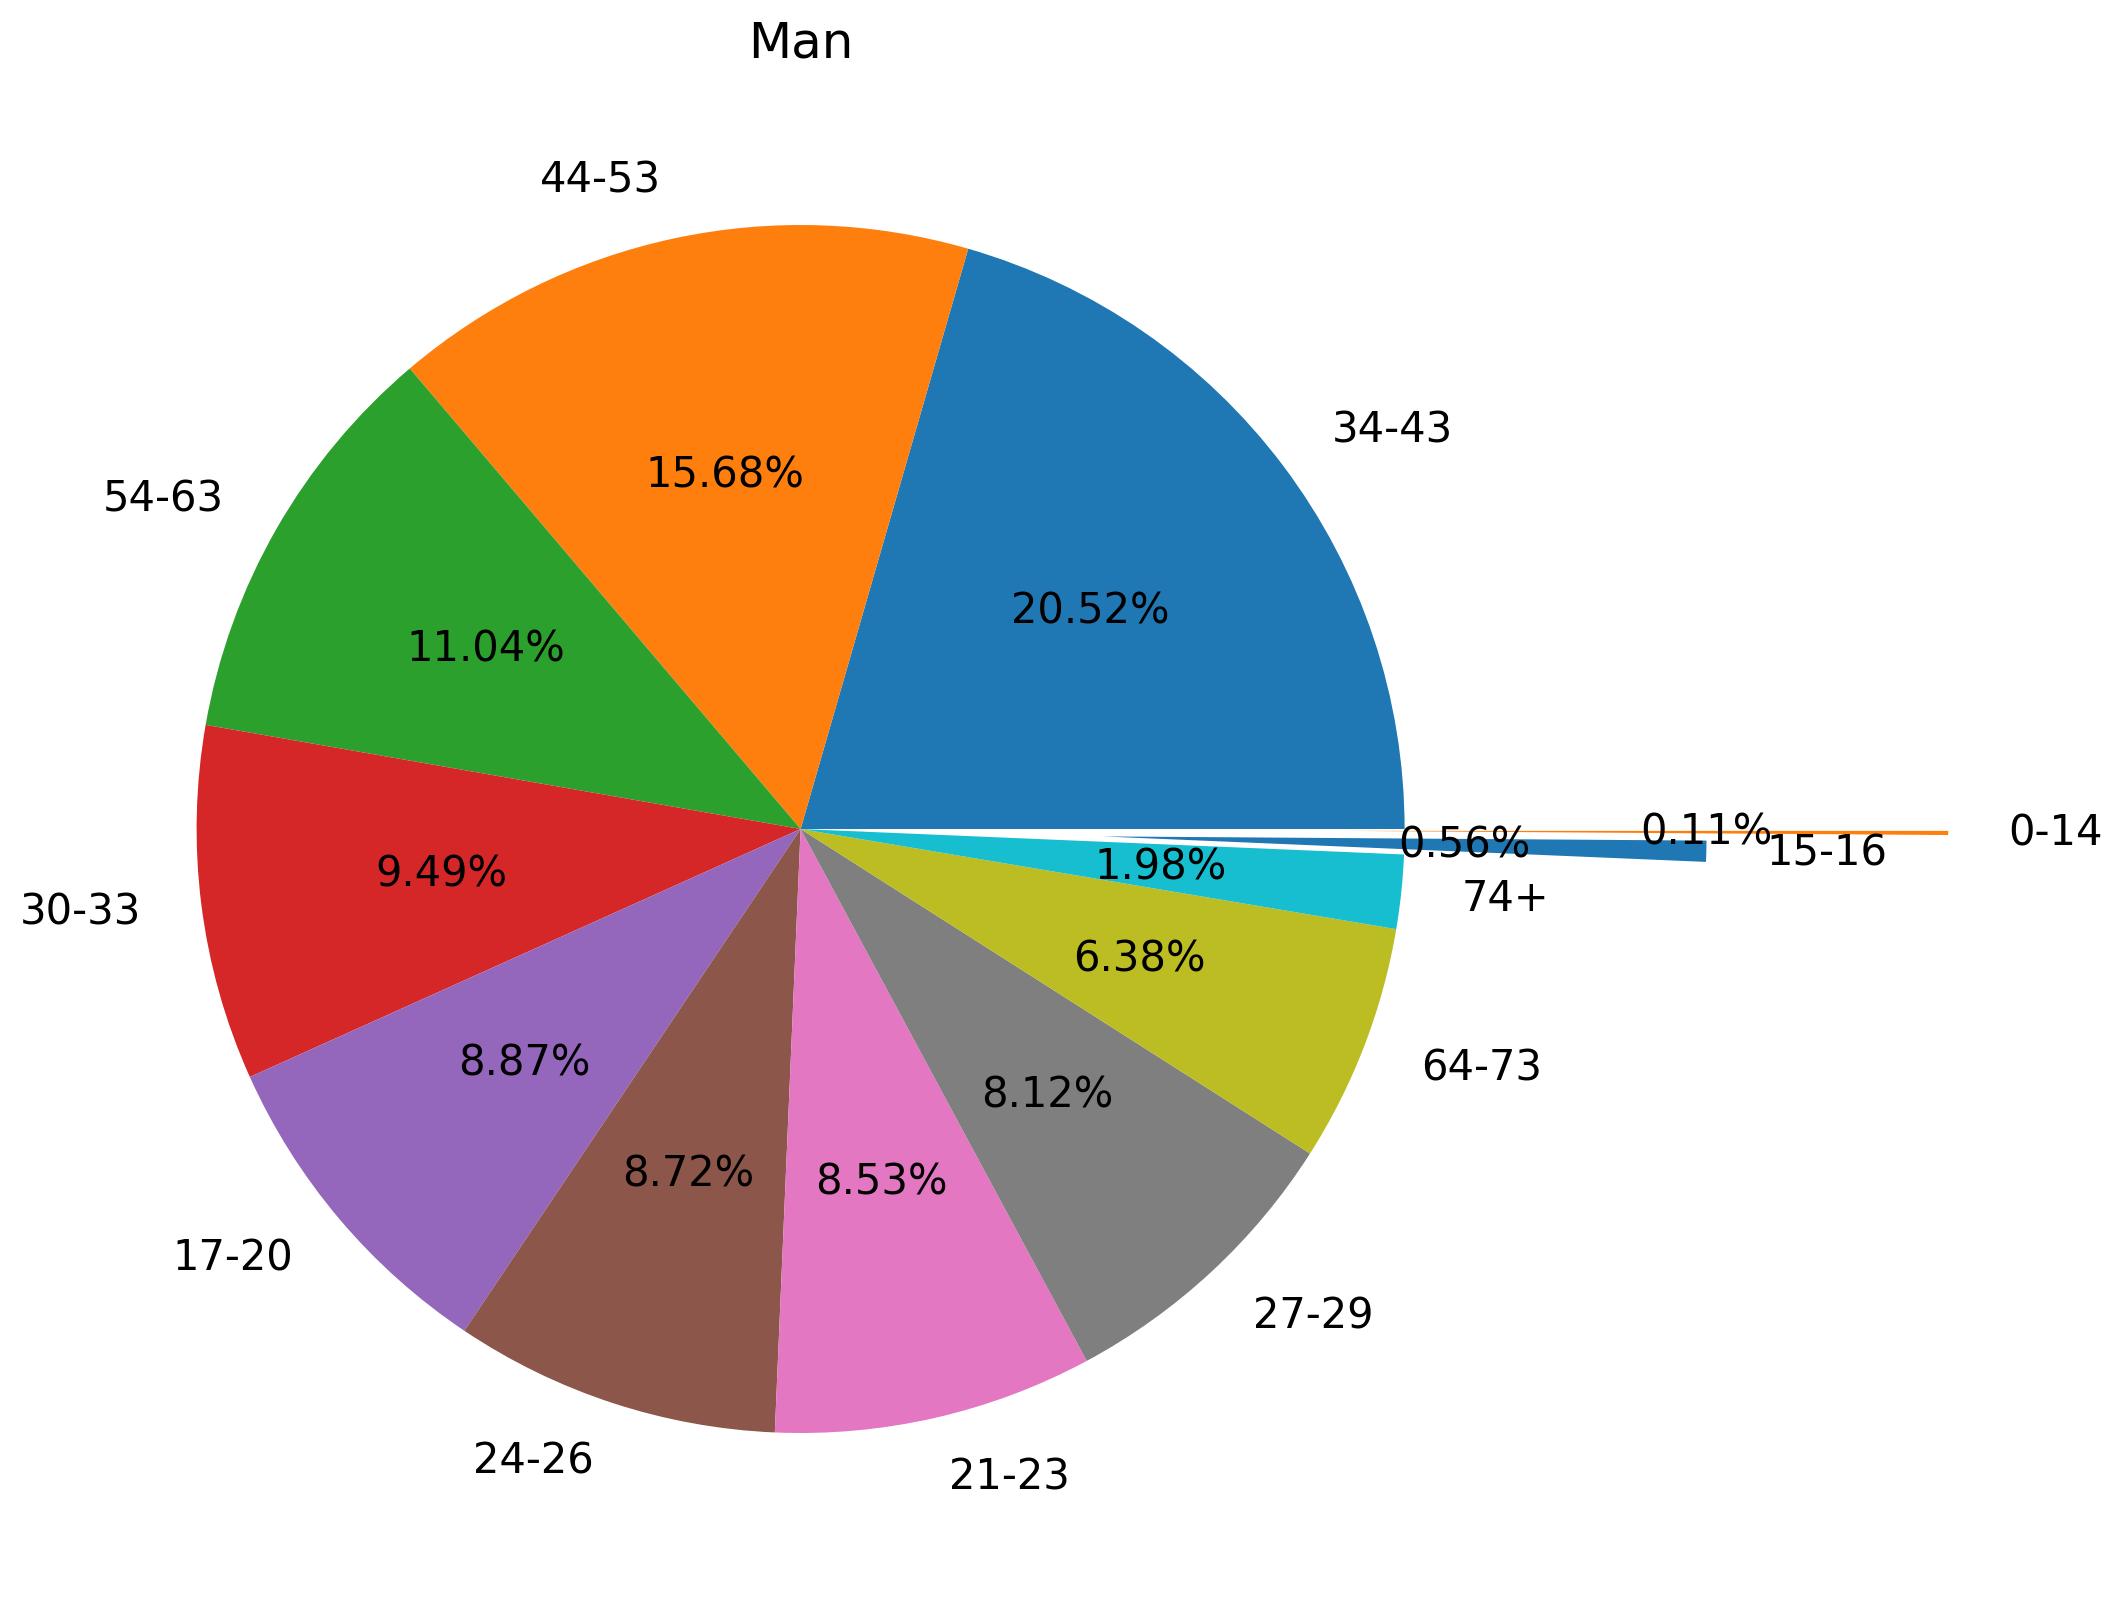

In [16]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(18, 10), dpi=200)
plt.title("Man")
plt.pie(ageMan, labels=ageMan.index, autopct='%1.2f%%', explode=[0, 0, 0,0, 0,0,0,0,0,0,0.5,0.9]) 

plt.show()

In order to enhance the classification and analysis of the offender data, several new features were incorporated into the dataset. 
The "Weekday" feature captures the specific day of the week when the violation took place. This categorical variable allows for further exploration of any potential patterns or trends in offender behavior based on the day of the week. 
The "Holiday" feature examines whether the date of the violation coincides with a Jewish holiday or not. This binary categorical variable (holiday/not holiday) offers insights into any potential associations between offender activity and significant religious observances.
Furthermore, the "Time the violation was committed" feature categorizes the period of the day when the offense occurred. It provides four distinct categories: night, morning, noon, and evening. This categorical variable allows for the examination of offender behavior during different time intervals and potential correlations between the time of day and the nature of the offense.

In [17]:

df['period'] = (df['Time'].dt.hour % 24 + 6) // 6
df['period'].replace({1: 'Night',
                      2: 'Morning',
                      3: 'Noon',
                      4: 'Evening',
                      }, inplace=True)
df["Date"] = pd.to_datetime(df["Time"]).dt.date
holidays = ['2016-03-24','2016-04-23','2016-04-29', '2016-05-11', '2016-05-12', '2016-06-05', '2016-06-12', '2016-08-14',
            '2016-10-03', '2016-10-04', '2016-10-12', '2016-10-17', '2016-10-24', '2016-12-25','2017-03-12', '2017-04-10',
            '2017-04-17', '2017-05-01', '2017-05-02', '2017-05-24', '2017-05-31', '2017-08-01', '2017-09-21', '2017-09-22',
            '2017-09-30', '2017-10-05', '2017-10-12', '2017-12-13', '2018-03-01','2018-03-31', '2018-04-07', '2018-04-18', 
            '2018-04-19', '2018-05-09', '2018-05-13', '2018-05-20', '2018-07-22', '2018-09-10', '2018-09-11', '2018-09-19',
            '2018-09-24', '2018-10-02', '2018-10-30', '2018-12-03', '2019-03-21', '2019-04-09', '2019-04-20', '2019-04-26',
            '2019-05-08', '2019-05-09', '2019-06-02', '2019-06-10', '2019-08-11', '2019-09-17', '2019-09-30', '2019-10-01',
            '2019-10-09', '2019-10-14', '2019-10-22', '2019-12-23', '2020-03-02', '2020-03-10', '2020-03-11', '2020-04-09',
            '2020-04-15', '2020-04-28', '2020-04-29', '2020-05-08', '2020-05-22', '2020-05-29', '2020-07-30', '2020-09-19',
            '2020-09-20', '2020-09-28', '2020-10-03','2020-10-10', '2020-12-11'
           ]
listHol = []
for d in df["Date"]:
    if str(d) in holidays:
        listHol.append("holiday")
    else:
        listHol.append("not holiday")
df["Holiday"] = listHol
weekday = []
for day in df["Time"]:
    weekday.append(day.weekday())
df["Weekday"] = weekday
df.head()


Time Initial report track Current report trackage  \
מספר דוח                                                                      
1111111111 2016-03-02 15:00:00           ברירת משפט              ברירת משפט   
1111111112 2016-04-16 04:15:00           ברירת משפט              ברירת משפט   
1111111113 2016-03-08 18:35:00           ברירת משפט              ברירת משפט   
1111111114 2016-03-15 15:10:00           ברירת משפט              ברירת משפט   
1111111115 2016-03-20 10:30:00           ברירת משפט              ברירת משפט   

           Current report treatment status  \
מספר דוח                                     
1111111111                  סגור עקב תשלום   
1111111112                  סגור עקב תשלום   
1111111113                  סגור עקב תשלום   
1111111114                  סגור עקב תשלום   
1111111115                  סגור עקב תשלום   

                                                       Article offense  \
מספר דוח                                                                 
1111111111                             אי ציות לתמרור 302 בצומת (עצור)   
1111111112                                        נהג ללא חגורת בטיחות   
1111111113  שימוש בטלפון בעת שהרכב נע שלא באמצעות מיקרופון המותקן ברכב   
1111111114                         סטייה מנתיב הנסיעה תוך הפרעה לתנועה   
1111111115                                           נהגת בחוסר זהירות   

            Code offense symbol  Initial fine amount  Identical number  \
מספר דוח                                                                 
1111111111                 6626                  250           1440473   
1111111112                 6702                  250           1564274   
1111111113                 6577                 1000           1369040   
1111111114                 5439                  250           1448260   
1111111115                 2429                  500           1449881   

           Category of the violation  Sex  \
מספר דוח                                    
1111111111           זכות קדימה לרכב  זכר   
1111111112       שימוש באמצעי בטיחות  זכר   
1111111113     אי נקיטת אמצעי זהירות  זכר   
1111111114             סטיות ונתיבים  זכר   
1111111115        נהיגה בחוסר זהירות  זכר   

           City where the violation was occured City of residence Religion  \
מספר דוח                                                                     
1111111111                                עפולה             נהריה    יהודי   
1111111112                                 חיפה          קרית אתא    יהודי   
1111111113                                 חיפה              עומר    יהודי   
1111111114                                 חיפה              חיפה   מוסלמי   
1111111115                                  עכו               עכו   מוסלמי   

              Age Religion group Type of vehicle  Number of vehicle   Area  \
מספר דוח                                                                     
1111111111  30-33          יהודי            פרטי           11192092  north   
1111111112  24-26          יהודי            פרטי           11120937  north   
1111111113  27-29          יהודי            פרטי           11118790  south   
1111111114  34-43       לא יהודי          ציבורי           11333385  north   
1111111115  34-43       לא יהודי               -           11372714  north   

             period        Date      Holiday  Weekday  
מספר דוח                                               
1111111111     Noon  2016-03-02  not holiday        2  
1111111112    Night  2016-04-16  not holiday        5  
1111111113  Evening  2016-03-08  not holiday        1  
1111111114     Noon  2016-03-15  not holiday        1  
1111111115  Morning  2016-03-20  not holiday        6

The majority of violations in the dataset were found to be committed on weekdays, as depicted in bar below. Interestingly, the least number of violations occurred on Friday and Saturday, which are traditionally considered as the weekend in many cultures. This observation suggests a potential correlation between the day of the week and the occurrence of offenses, highlighting the importance of analyzing temporal patterns in offender behavior.

<AxesSubplot:>

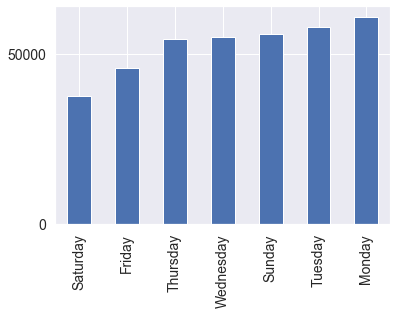

In [39]:
df["Weekday"].replace([0,1,2,3,4,5,6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).value_counts().sort_values().plot(kind = 'bar', fontsize=14)


In [18]:
del df['Time']
del df["Identical number"]
del df["Number of vehicle"]

prepare_inputs(X):

Purpose: This function is used to prepare the input features (X) for a machine learning model by encoding categorical features into numerical values.

prepare_targets(y):

Purpose: This function is used to prepare the target labels (y) for a machine learning model by encoding categorical labels into numerical values.

In [19]:
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc

def prepare_targets(y):
    le = LabelEncoder()
    le.fit(y)
    y_enc = le.transform(y)
    return y_enc

In [32]:
alph = ['א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'כ', 'ך', 'מ', 'ם', 'ל', 'נ', 'ן', 'ס', 'ע', 'פ', 'ף', 'צ', 'ץ', 'ק', 'ר', 'ש', 'ת']
def ReverseNamesHebrew(array):
    array_new = [];
    for a in array:
        for b in a:
            if b in alph:
                break;
            else:
                return array
    for a in array:
        array_new.append(a[::-1])
    return array_new;

The purpose of the provided function confusion_mat appears to be generating and visualizing a confusion matrix for evaluating the performance of a classification model. A confusion matrix is a table that is often used to describe the performance of a classification algorithm.

In [40]:
def confusion_mat(y_test, y_pred, categ, count):
    cf_matrix = confusion_matrix(list(y_test), y_pred)
    categories = categ

    group_percentages = [value for value in cf_matrix.flatten()]

    labels = [f'{v1}' for v1 in group_percentages]
    labels = np.asarray(labels).reshape(count,count)
    fig, ax = plt.subplots(figsize=(100,100)) 
    ax.tick_params(axis='both', labelsize = 120)
    
      
    categories = ReverseNamesHebrew(categories)
    sns.set(font_scale=7)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
                    xticklabels = categories, yticklabels = categories, linewidth = 0.5, ax = ax)

    plt.xlabel("Predicted ", fontdict = {'size':14}, labelpad = 30)
    plt.ylabel("Actual "   , fontdict = {'size':14}, labelpad = 30)
    plt.title ("Confusion ", fontdict = {'size':18}, pad = 100)
    plt.savefig("output.jpg")
    return cf_matrix

In [21]:
df = df.replace({"Religion": {"יהודי": 'Jew',"מוסלמי": 'Muslim', "נוצרי": 'Christian', "לא ידוע": 'Unknown', "דרוזי/צ'רקסי": 'Druze/Ciracssian', 
                       "נוצרי ערבי": 'Christian Arabi'}})

The purpose of the provided function classification is to perform classification tasks using a machine learning model and evaluate its performance. It is function for training a classification model, splitting the data into training and testing sets, and then printing out information about the model's accuracy and a confusion matrix. 

In [22]:
def classification(model, X_enc, y_enc, labels):
    X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.3, random_state=1)
    print('Train', X_train.shape, y_train.shape)
    print('Test', X_test.shape, y_test.shape)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(list(y_test), y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    confusion_mat(y_test, y_pred, labels, len(labels))

# Research Question 1: Can a predictive model be built to determine the offender's religion based on other data?

We utilized a standardized input consisting of 17 features and 1 target value (religion) for both the training and test datasets. The data was split into two sets with a ratio of 30% for the test data and 70% for the training data. The XGB Classifier achieved an accuracy of 83.4%.


The confusion matrix provides a comprehensive overview of the classification performance using XGB Classifier for different religious groups in the dataset. It reveals how well the predictive model correctly identifies individuals belonging to each religious category. 

For Jews, the model achieved remarkable accuracy, correctly classifying 96% of Jewish violators (44,392 cases). Similarly, for Muslims, the model showed commendable performance, accurately identifying 89% of Muslim offenders (39,425 cases).

However, the classification results for other religious groups varied. Christians, for instance, were correctly identified in 1,968 cases, representing an accuracy of 21%. The accuracy for violators with an unknown religion was approximately 55%, with 3,845 people correctly classified.

Druze Christians exhibited a better classification accuracy, with 71% precision in 2,326 cases. Nonetheless, the limited number of examples for Christian Arabs hindered precise identification, as only 5 offenders were available for this category.


Train (256896, 16) (256896,)
Test (110099, 16) (110099,)
Accuracy: 83.48%


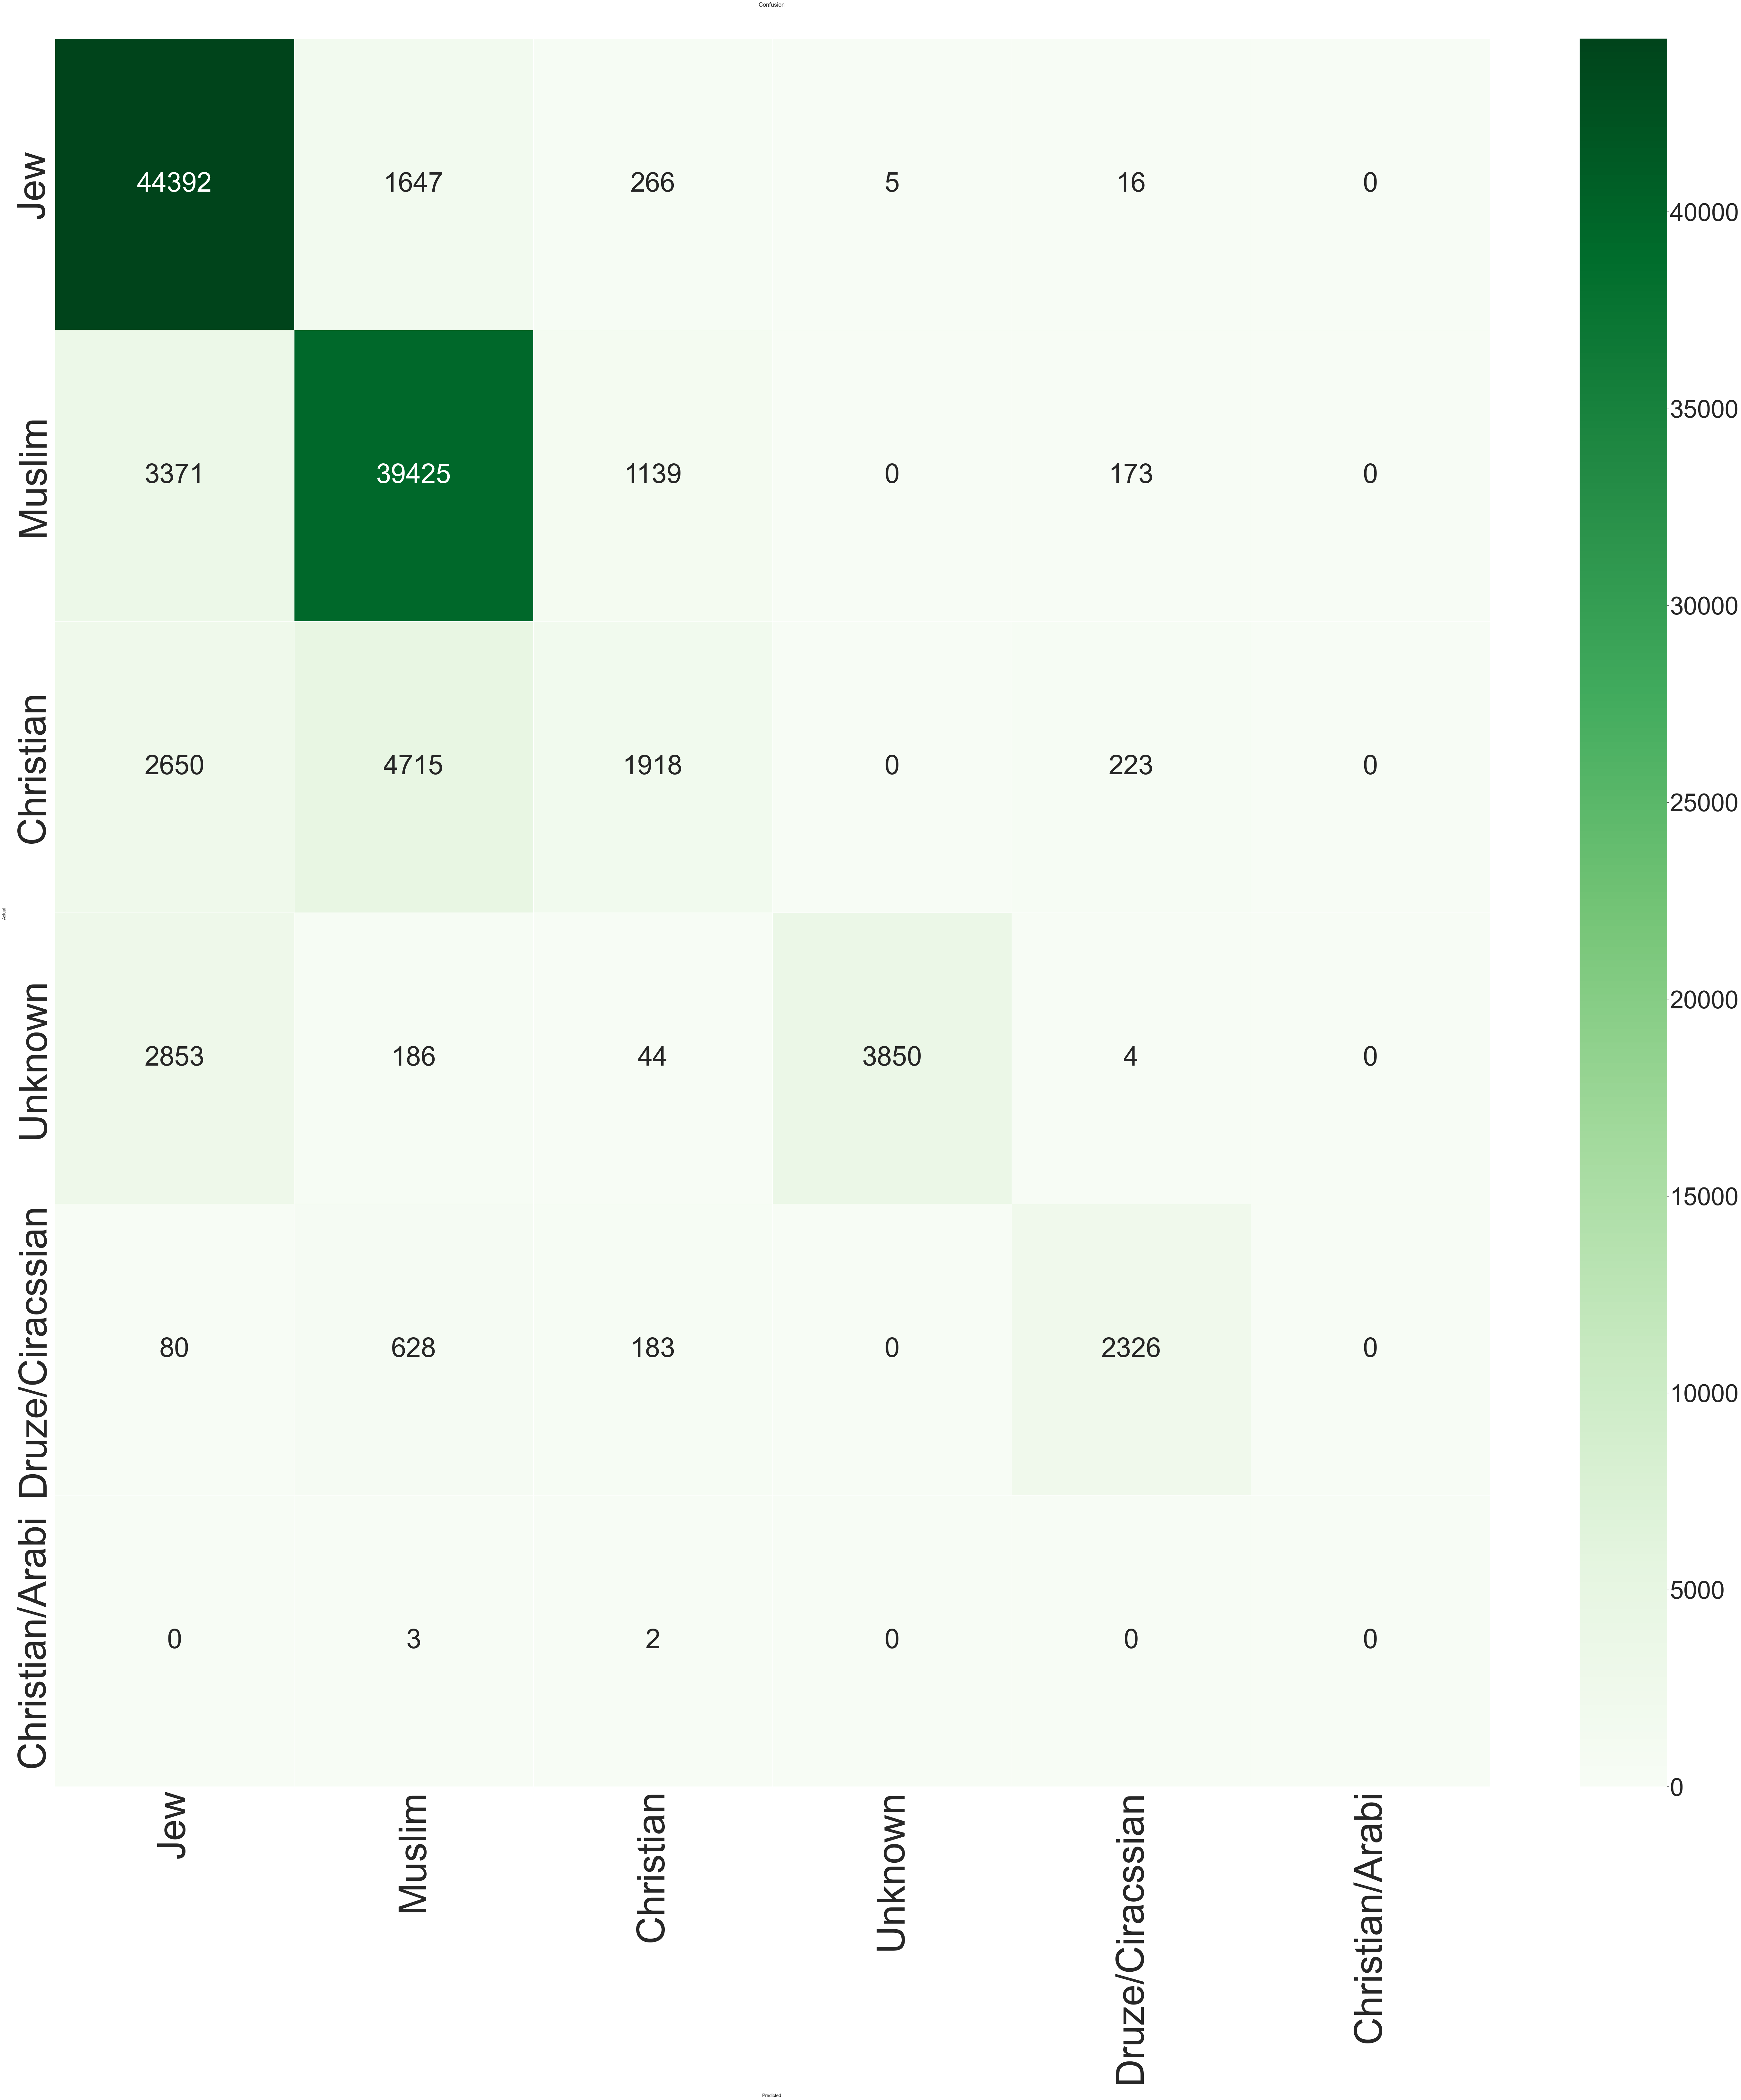

In [41]:
mymap = {'Jew':0 , 'Muslim':1, 'Christian':2, 'Unknown':3, 'Druze/Ciracssian':4, 'Christian Arabi':5 }
df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
data = df.values
X = data[:,[0,1,2,3,4,5,6,7,8, 9, 11, 13, 14, 15, 16, 17]]
Y = data[:,10]
Y=Y.astype('int')
X_enc = prepare_inputs(X)
y_enc = Y
classification(XGBClassifier(), X_enc, y_enc, ['Jew','Muslim', 'Christian', 'Unknown', 'Druze/Ciracssian', 'Christian/Arabi'])

Logistic Regression model achieved an accuracy of 62.93%.

The confusion matrix for the logistic regression model provides valuable insights into the model's performance in accurately identifying individuals belonging to different religious groups.

For Jews, the logistic regression model achieved an accuracy of 74%, correctly classifying 34,353 cases. Similarly, for Muslims, the model showed a 70% accuracy, correctly identifying 31,110 cases.

However, the classification results for other religious groups were not as successful. Christians, unfortunately, were not identified at all, resulting in an accuracy of 0%. The logistic regression model struggled with religions that had limited representation in the dataset, as evidenced by Muslims being misclassified as Jews in 4,431 cases and as Muslims in 5,049 cases.

Religion unknown was determined with an accuracy of approximately 44%, correctly classifying 3,825 people.
Regarding Druze Christians and Christian Arabs, the model encountered challenges due to the scarcity of data available for these groups. Consequently, they were not identified at all, similar to Christians.

The confusion matrix clearly highlights the logistic regression model's strengths and limitations in classifying religious affiliations. It demonstrates the model's relatively high accuracy in distinguishing Jews and Muslims but reveals areas where improvements are necessary, especially for underrepresented religious groups.


Train (256896, 16) (256896,)
Test (110099, 16) (110099,)
Accuracy: 62.93%


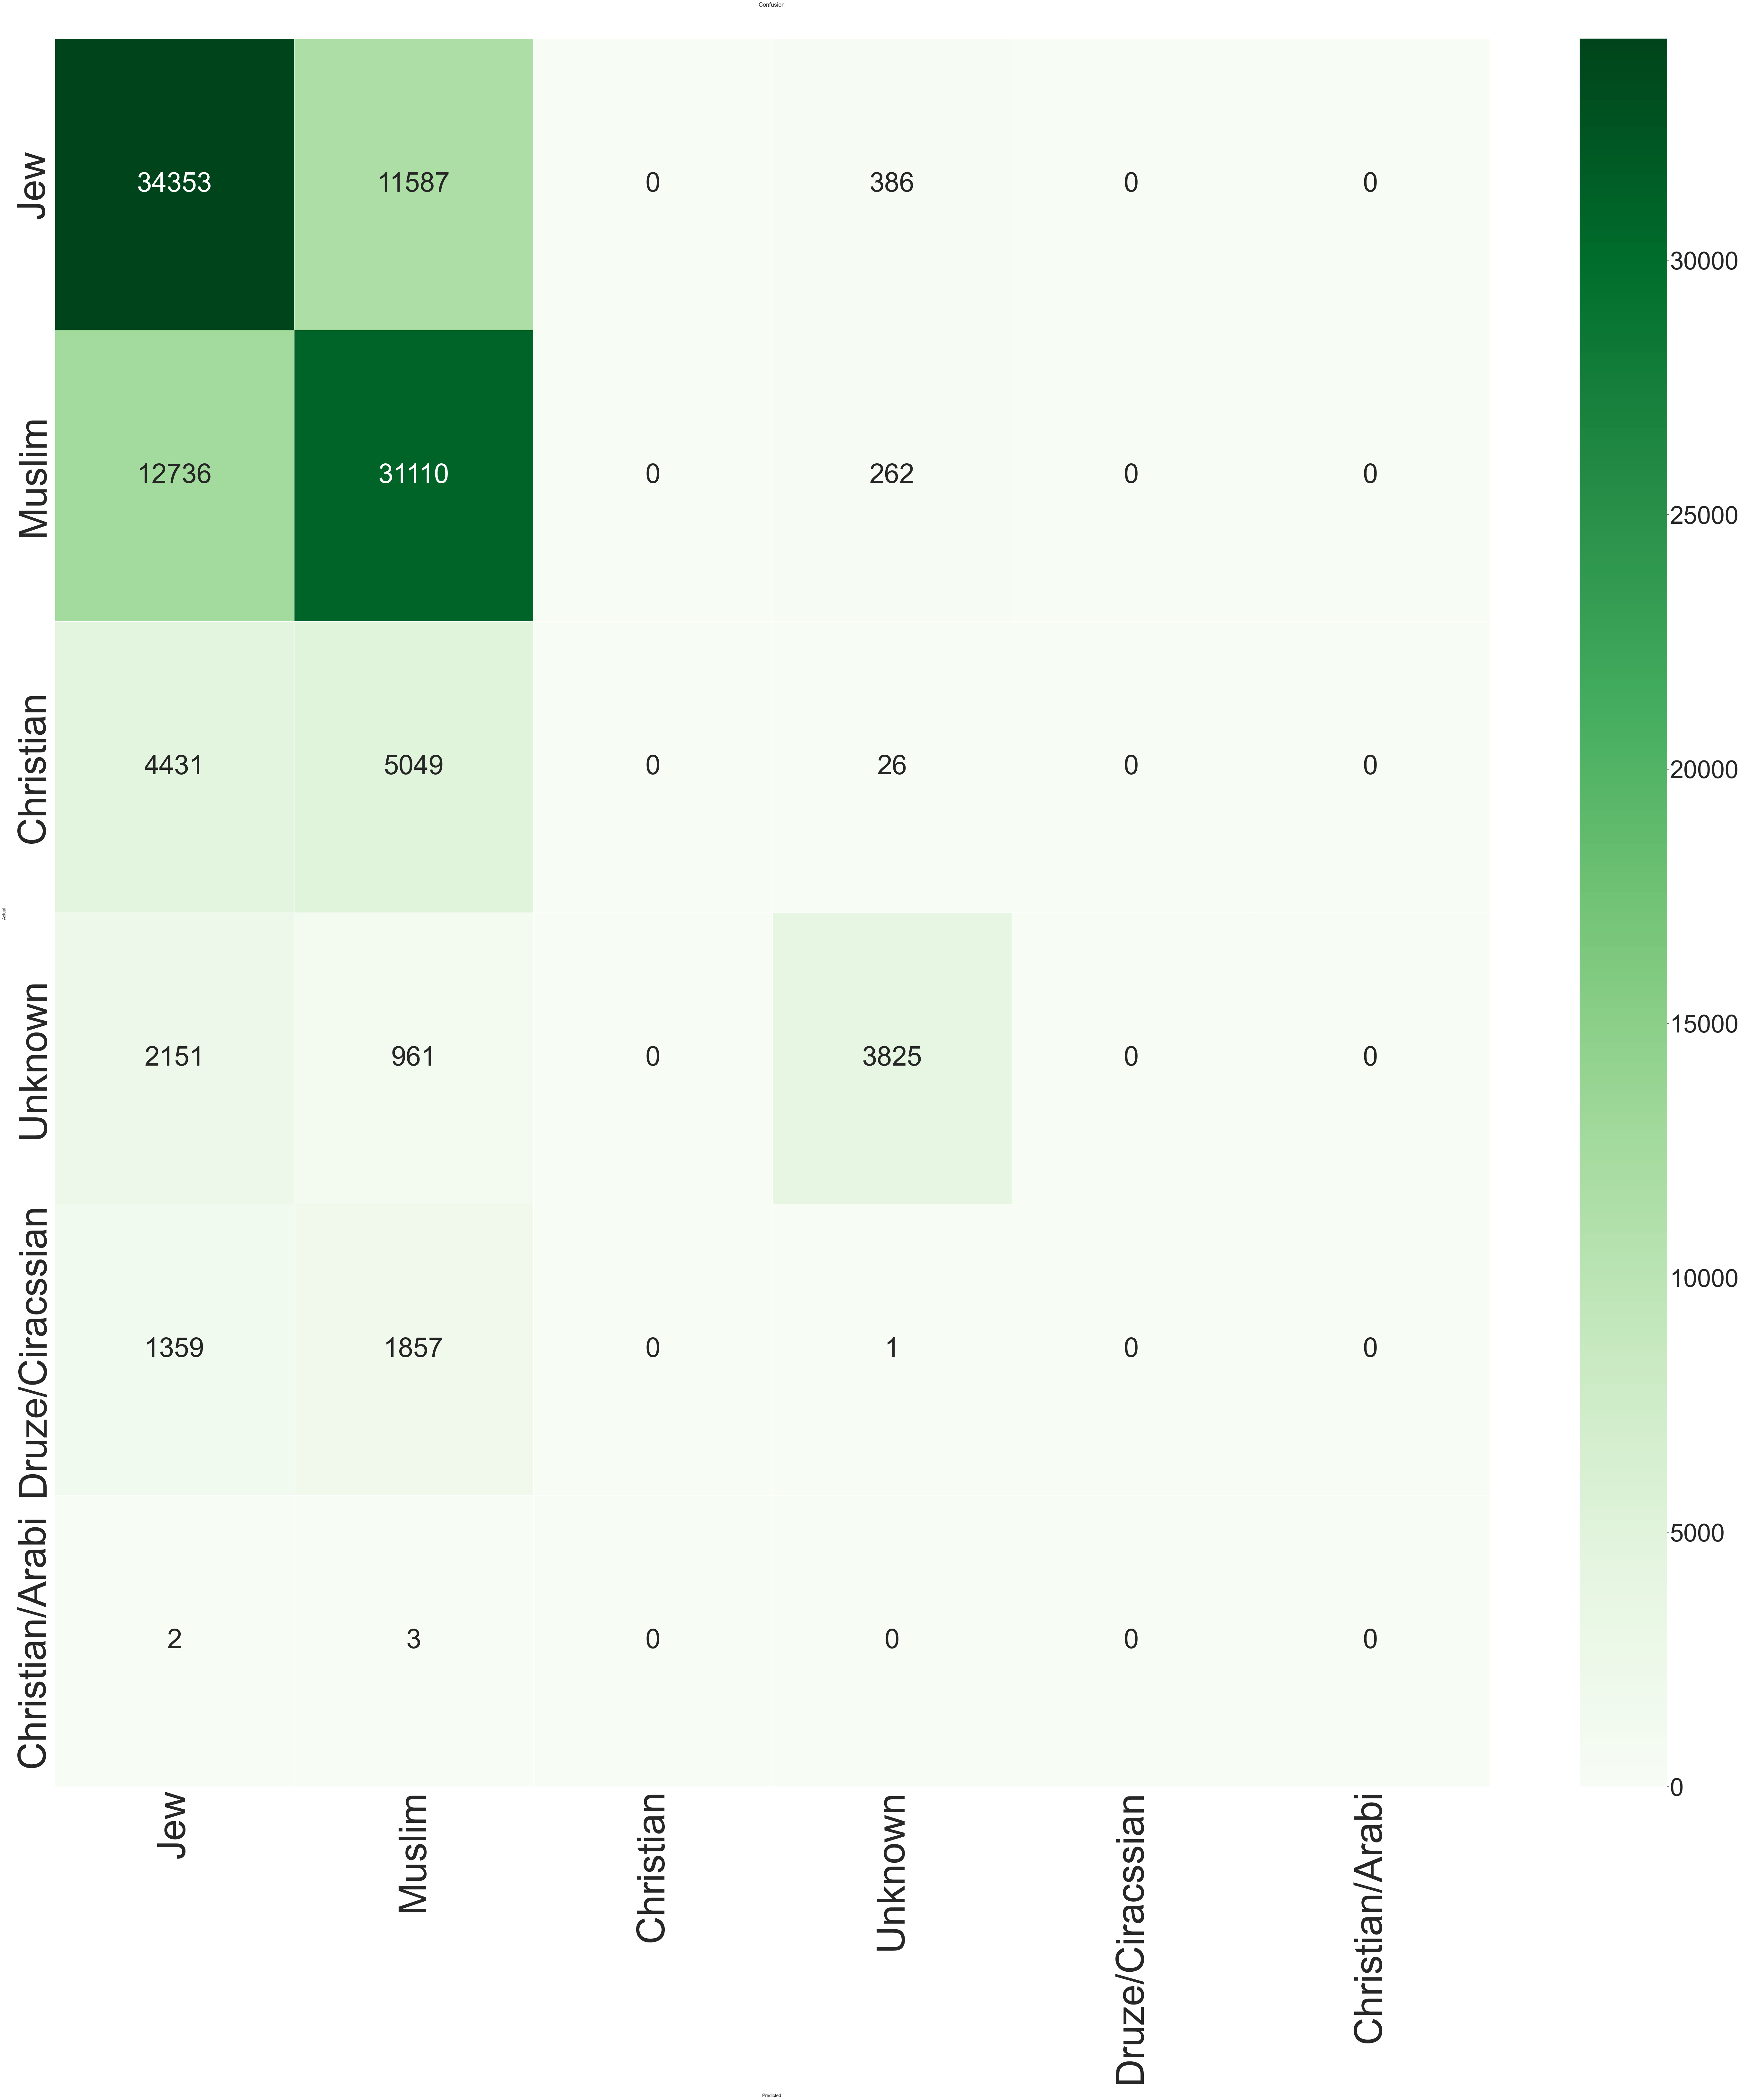

In [42]:
X_enc = preprocessing.scale(X_enc)
classification(LogisticRegression(solver='sag'), X_enc, y_enc, ['Jew','Muslim', 'Christian', 'Unknown', 'Druze/Ciracssian', 'Christian/Arabi'])

# Research Question 2: Whether it's possible to build a predictive model for determining the time of the day by article offense?

As input, we utilized the value of the article offense as the independent variable and the target value of time of the day as the dependent variable for both the training and test datasets. The data was split into two sets, with 30% allocated for the test data and 70% for the training data.

The results obtained from the confusion matrix below in predicting the time of day based on article offense indicate that the overall classification accuracy is relatively low, standing at 40.28%. This finding suggests that the model's performance is not favorable in response to our research question, which aimed to explore the possibility of building a predictive model for determining the time of day by analyzing the article offense.
Upon closer examination of the confusion matrix, we observe the following outcomes based on different time periods:

1. Morning Hours: The model correctly identifies violations occurring in the morning in 32,087 cases, demonstrating an accuracy of 71%. This indicates a relatively acceptable level of accuracy in predicting violations that happen during this time

2. Daytime: However, the model's accuracy significantly drops when determining violations in the daytime, with only 11270 cases correctly identified, resulting in an accuracy of merely 34%. This indicates that the model struggles in accurately predicting violations occurring during the daytime.

3. Evening Hours: The model's performance deteriorates further when attempting to identify violations in the evening hours, correctly classifying only 27 cases, which corresponds to a meager accuracy of 3%. This suggests that the model faces considerable challenges in predicting violations occurring in the evening.

4. Nighttime: The model also exhibits suboptimal performance in detecting violations during nighttime, with only 959 cases correctly identified, resulting in an accuracy of 16%. This indicates that the model's ability to accurately predict violations during nighttime is limited.


Train (256896, 1) (256896,)
Test (110099, 1) (110099,)
Accuracy: 40.28%


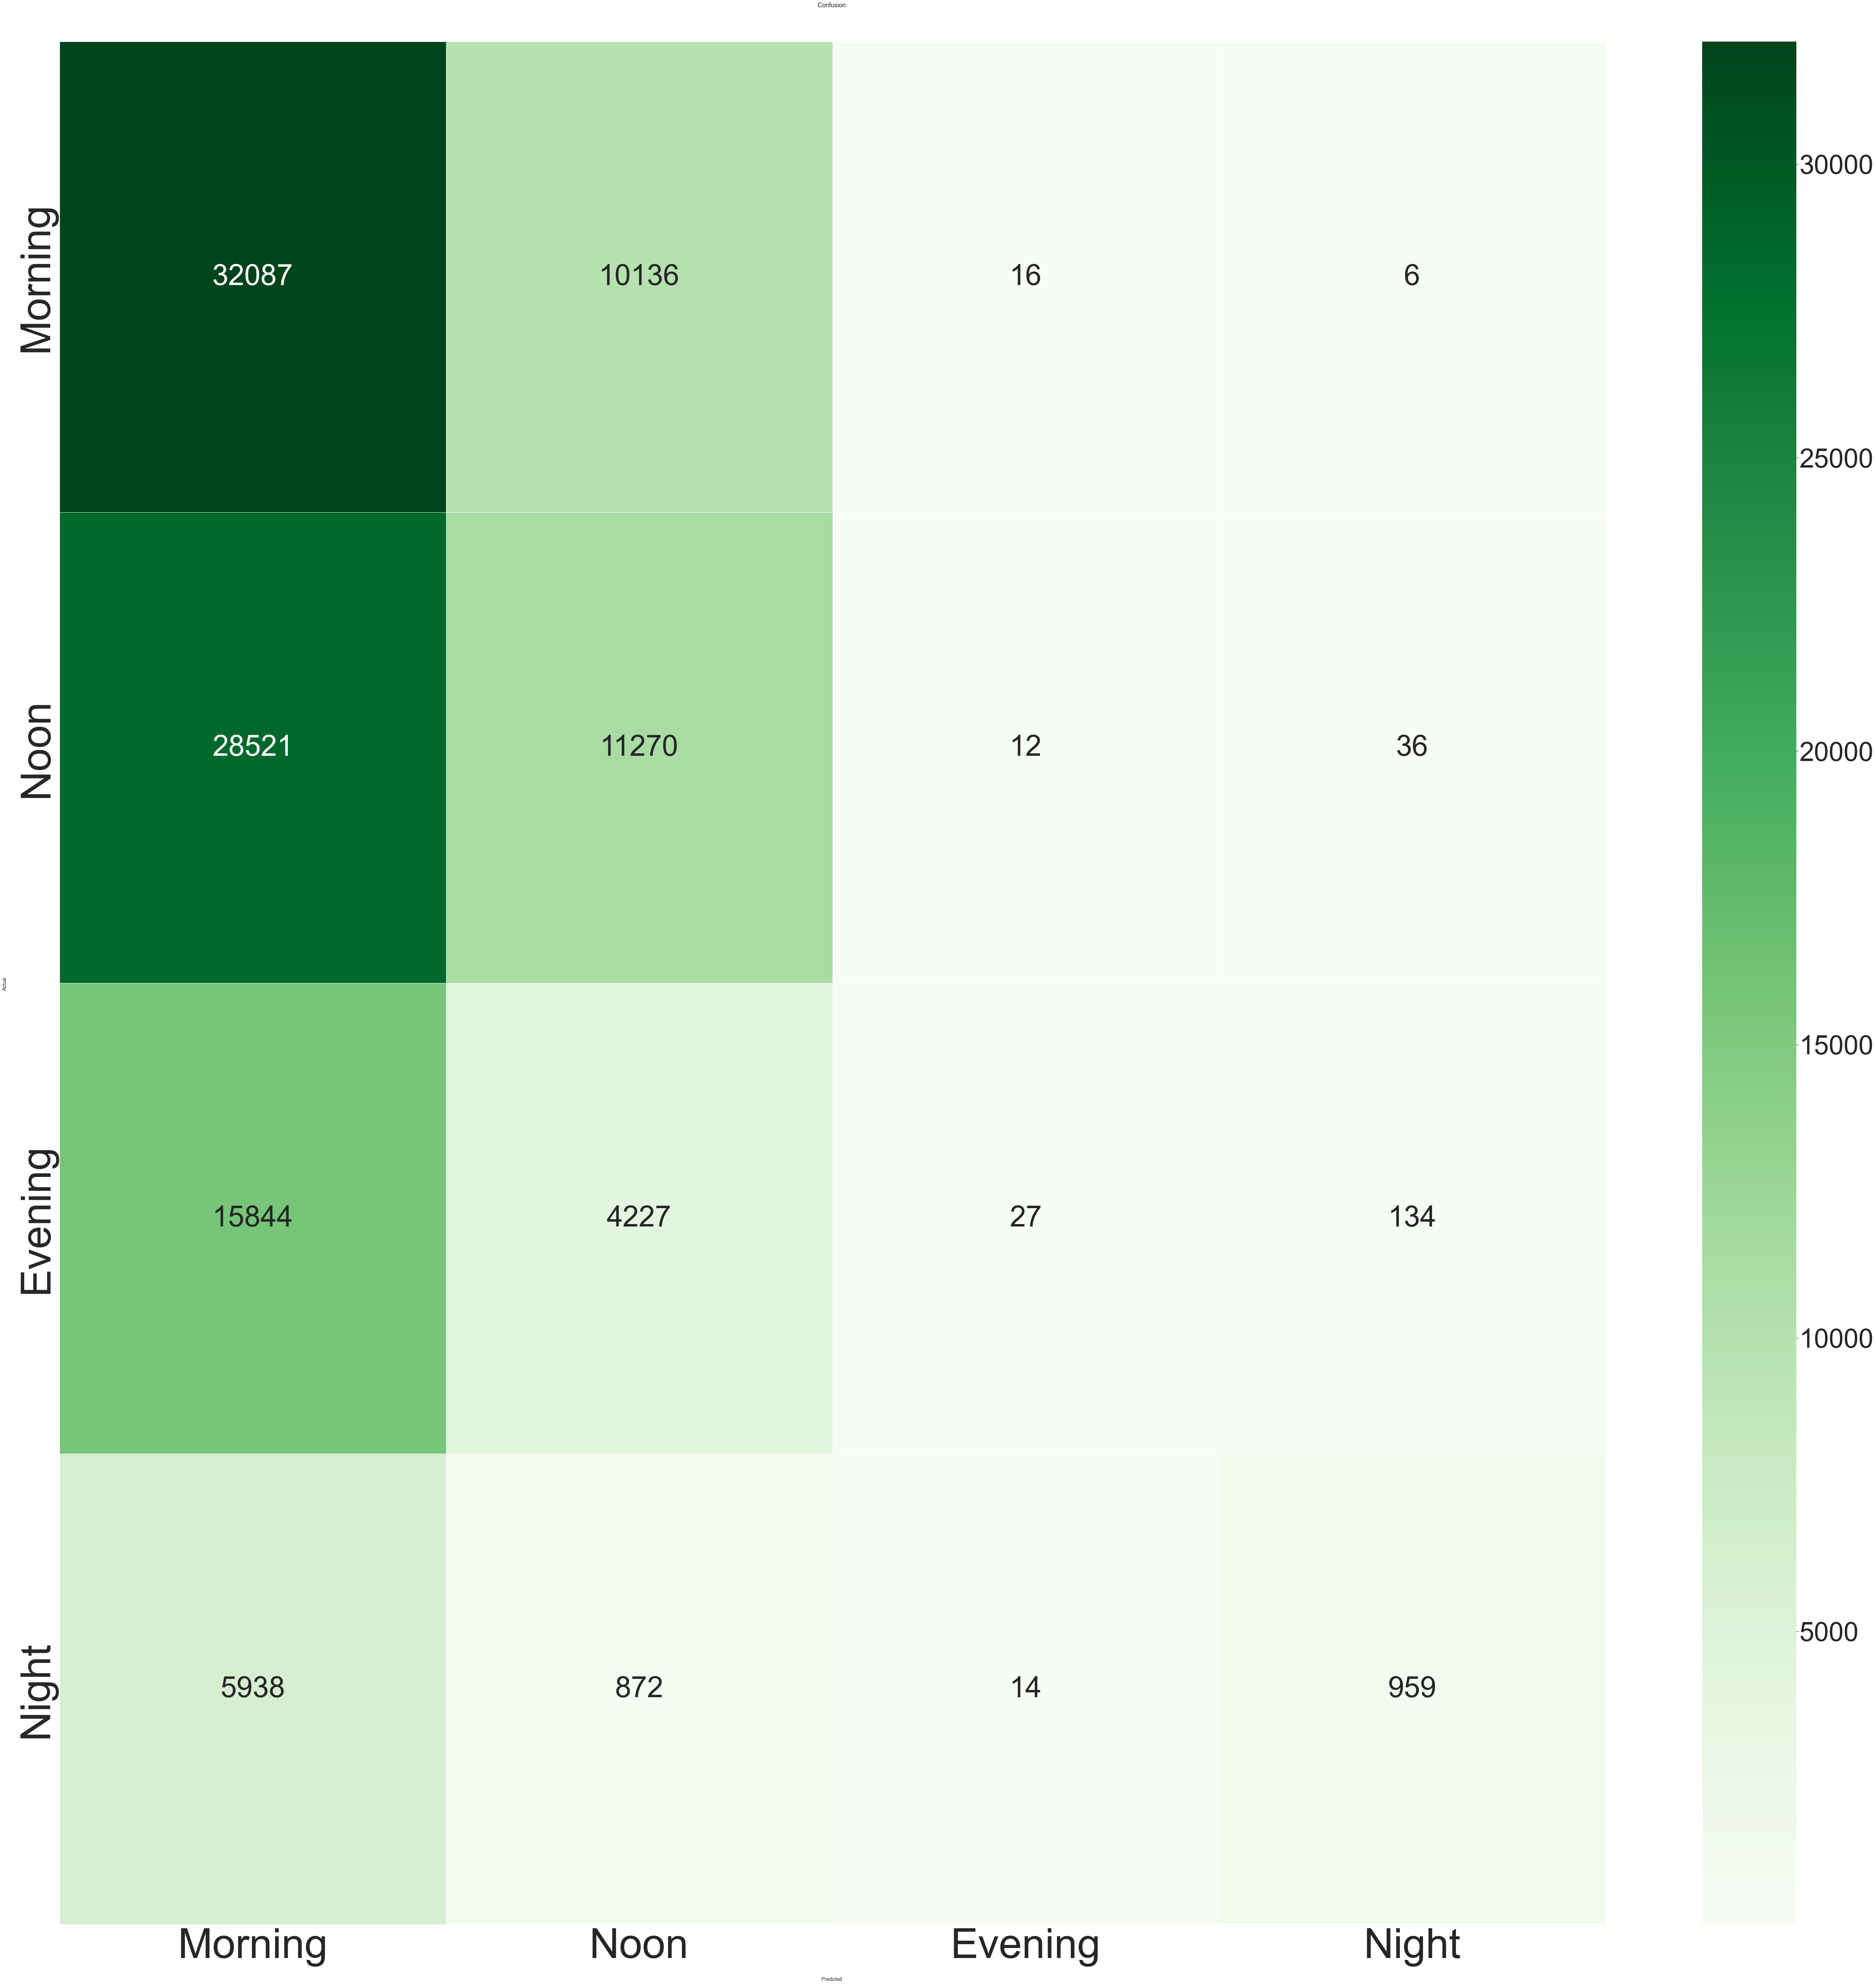

In [52]:
mymap = {'Morning':0 , 'Noon':1, 'Evening': 2, 'Night': 3, 'Late Night': 4, 'Early Morning': 5}
df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
data = df.values
#category of the violation and time of the day
X = data[:,[6]]
Y = data[:,15]
Y=Y.astype('int')
X_enc = prepare_inputs(X)
y_enc = Y
classification(XGBClassifier(), X_enc, y_enc, ['Morning','Noon', 'Evening', 'Night'])

The outcomes from the Confusion Matrix for Logistic Regression in Predicting Period of Day derived using the logistic regression model to predict the time of day based on article offense reveal an overall classification accuracy of 38.37%.

These results indicate that the model's performance is unsatisfactory in relation to our second research question. It appears that building a predictive model to determine the time of day by article offense is not feasible with this approach.

Analyzing the individual time periods, we find that the model performs relatively well in identifying violations during the morning hours, with an accuracy of 82%. However, its accuracy significantly drops when attempting to predict violations during the daytime, achieving only 19% accuracy. The model encounters even greater challenges in correctly classifying violations during the evening and nighttime, as it fails to identify any cases accurately for these periods, resulting in accuracies of 0%.

In summary, the logistic regression model's performance in predicting the time of day based on article offense is limited. While it shows acceptable accuracy for violations in the morning hours, its effectiveness diminishes significantly for violations during the daytime, and it proves to be ineffective in predicting violations during the evening and nighttime. These findings emphasize the model's shortcomings and highlight the need for further research and exploration of more suitable approaches to improve the prediction accuracy for the time of day based on article offense.


Train (256896, 1) (256896,)
Test (110099, 1) (110099,)
Accuracy: 38.37%


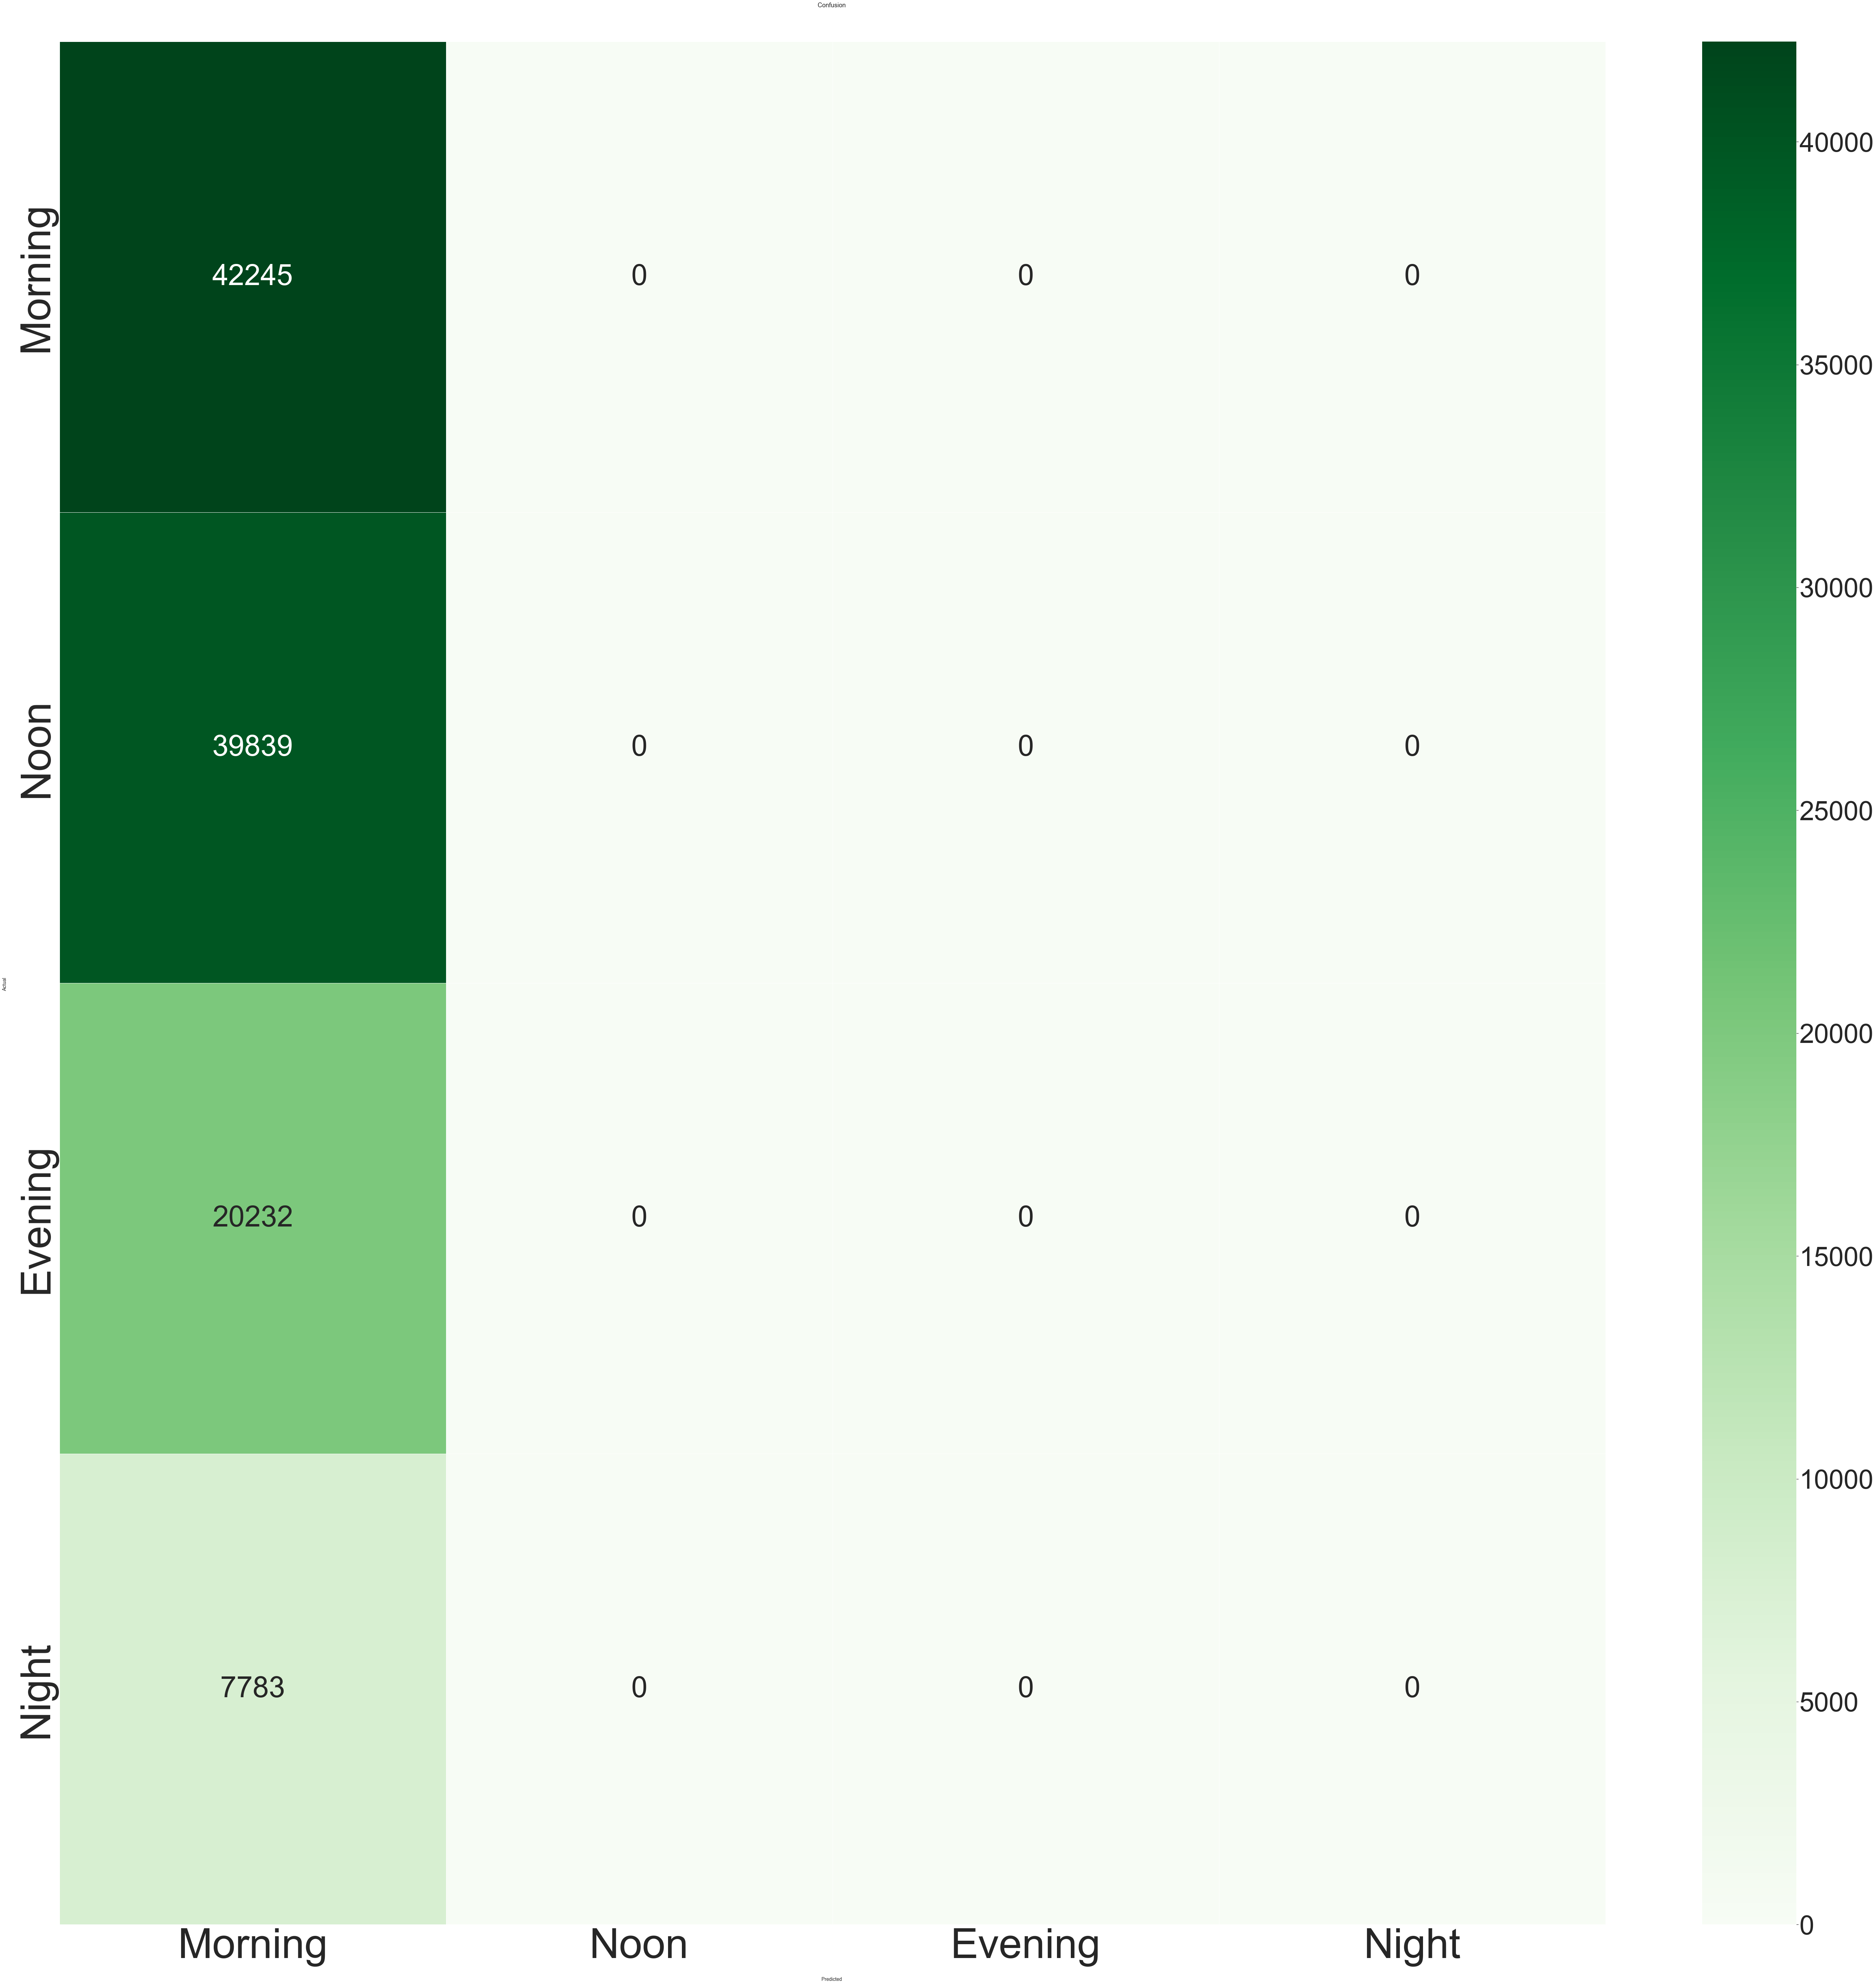

In [51]:
X_enc = preprocessing.scale(X_enc)
classification(LogisticRegression(solver='lbfgs'), X_enc, y_enc, ['Morning','Noon', 'Evening', 'Night'])

# Research Question 3: Whether it's possible to build a predictive model for determining the article offense by category of the violation?

To address this research question, we will delve into the realm of fine-grained classification. Fine-grained categorization is a specialized area within object recognition that focuses on distinguishing subordinate categories within broader entry-level categories. In our dataset, we have identified two crucial features of interest: Article offense and Category of the violation. The Category of the violation encompasses 26 distinct values, while the Article offense represents a more specific subcategory within the broader context of the violation.
Our methodology entails constructing a predictive model that utilizes the available data to accurately determine the article offense. Subsequently, we will expand our analysis to predict the corresponding category of the violation. By comparing the results of the predictions, presented in the form of a tuple comprising the violation category and the article offense, with the actual outcomes, we can effectively evaluate the model's efficacy in precisely identifying the specific article offense based on the broader violation category.

In our endeavor to answer question 3, to build a predictive model for determining the article offense based on the category of the violation, we employed the XGB Classifier algorithm. The model was trained and tested using a dataset that consisted of 16 features, excluding the category violation and article offense. The target value for prediction was the category of the violation. The dataset was divided into a 70% training set and a 30% test set to assess the model's performance.The accuracy achieved by the model in predicting the category of the violation was 62.01%.

As input we have 17 features(all features except category violation and article offense) and 1 target value(category violation) for training and test data.
The percentage of splitting data is 30% for test data and 70% for train data.
The accuracy achieved by the model in predicting the category of the violation was 62.01%.

Upon analyzing the results, we observed that the overall accuracy of the model was insufficient to accurately identify the category of the violation.  Given the large number of categories in this feature, it is more convenient to present the results in confusion matrix below.
There, you can observe the percentage accuracy for each category and the corresponding number of correctly identified violations. We were able to achieve higher accuracy in classifying certain specific categories, such as speed, drugs/alcohol, and failure to take precautions. For these particular categories, the classification accuracy exceeded 80%.  It is important to note that these specific categories constitute only a small portion, approximately 12%, of the total number of categories. Due to the limited overall accuracy and the presence of numerous subcategories with insufficient data, the model's capability to predict subcategories accurately is compromised. The scarcity of violation entries within each subcategory hinders the model's ability to make precise predictions across all categories.

In [53]:
df = df.loc[df['Article offense'].isin(df['Article offense'].value_counts().index[df['Article offense'].value_counts() > 3])]
df = df.loc[df['Category of the violation'].isin(df['Category of the violation'].value_counts().index[df['Category of the violation'].value_counts() > 1])]
categories = list(df["Category of the violation"].value_counts().index)
subcategories = list(df["Article offense"].value_counts().index)
del df["Code offense symbol"]
data = df.values
oe = OrdinalEncoder()
X = data[:,[0,1,2,3,4,6,7,8, 9,10,  11,12, 13, 14, 15, 16, 17]]
Y = data[:,5]
oe.fit(X)
le = LabelEncoder()
le.fit(Y)
X_enc = oe.transform(X)
y_enc = le.transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.3, random_state=42)
xtest3column = X_test[:,3]
X_train = X_train[:,[0,1,2,4,5,6,7,8, 9,10,  11,12, 13, 14, 15, 16]]
X_test = X_test[:,[0,1,2,4,5,6,7,8, 9,10,  11,12, 13, 14, 15, 16]]

In [54]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(list(y_test), y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.08%


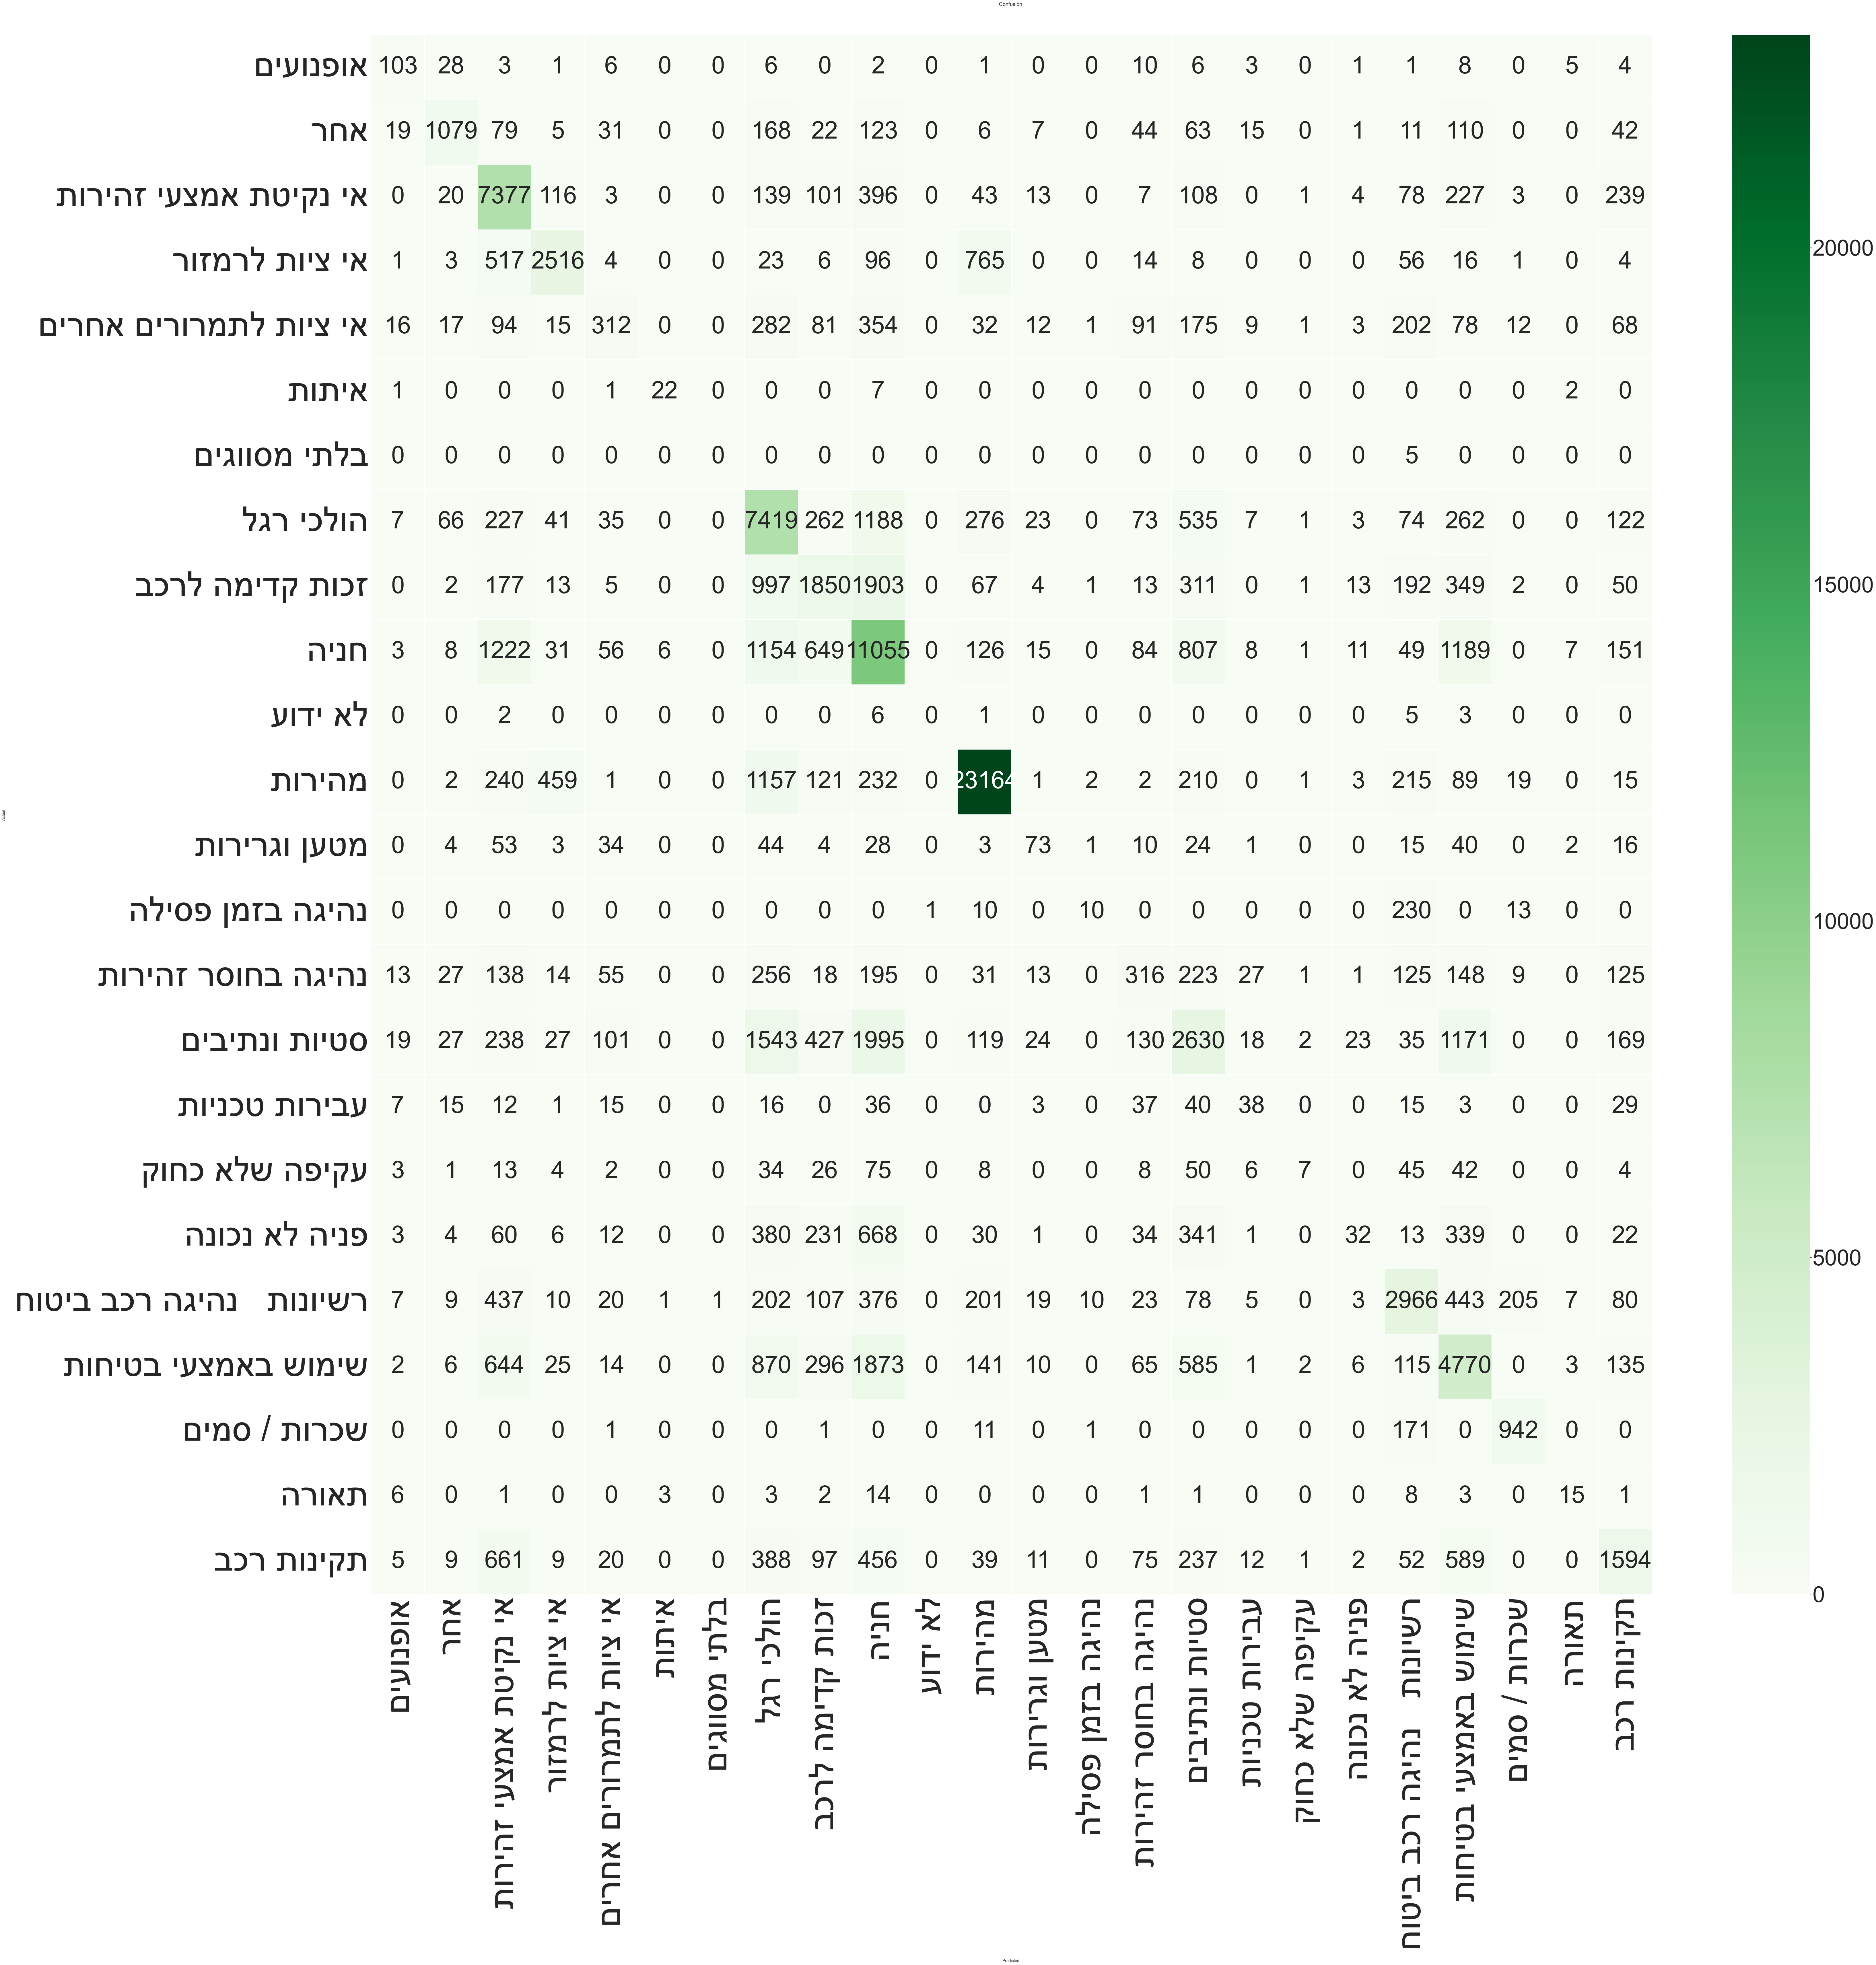

In [55]:
y_test_copy = []
for y in y_test:
    y_test_copy.append(y)
y_test_copy.sort()
categories = (pd.DataFrame(le.inverse_transform(y_test_copy))[0].unique())
categories_counts = pd.DataFrame(le.inverse_transform(y_test_copy))[0].value_counts()[categories].values
categories_index = pd.DataFrame(le.inverse_transform(y_test_copy))[0].value_counts()[categories].index
matrix = confusion_mat(y_test, y_pred, categories, len(categories))

The percentage accuracy for each category and the corresponding number of correctly identified violations. We were able to achieve higher accuracy in classifying certain specific categories, such as speed, drugs/alcohol, and failure to take precautions. For these particular categories, the classification accuracy exceeded 80%. 

In [56]:
tableres = []
for i in range(len(categories_index)):
    tableres.append(round((matrix[i][i] / categories_counts[i]) * 100.0, 2))
dfres = pd.DataFrame(data  = {"categories": categories_index, "accuracy in %": tableres})
dfres.sort_values(by = "accuracy in %", ascending = False)

categories  accuracy in %
11                     מהירות          89.32
21               שכרות / סמים          83.58
2       אי נקיטת אמצעי זהירות          83.12
7                   הולכי רגל          69.85
5                       איתות          66.67
9                        חניה          66.47
3              אי ציות לרמזור          62.43
1                         אחר          59.12
19  רשיונות   נהיגה רכב ביטוח          56.93
0                    אופנועים          54.79
20        שימוש באמצעי בטיחות          49.88
23                 תקינות רכב          37.44
8             זכות קדימה לרכב          31.09
15              סטיות ונתיבים          30.24
22                      תאורה          25.86
12               מטען וגרירות          20.56
14         נהיגה בחוסר זהירות          18.21
4      אי ציות לתמרורים אחרים          16.82
16              עבירות טכניות          14.23
13           נהיגה בזמן פסילה           3.79
17             עקיפה שלא כחוק           2.13
18              פניה לא נכונה           1.47
10                    לא ידוע           0.00
6                בלתי מסווגים           0.00

In [57]:
xtest = pd.DataFrame(X_test)
xtest["Y"] = xtest3column 
xtest["y_test"] = y_test
xtest["pred"] = y_pred
xtest = xtest.loc[xtest['Y'].isin(xtest['Y'].value_counts().index[xtest['Y'].value_counts() > 7])]
xtest.head(10)

0    1     2     3    4     5       6    7     8    9    10   11   12  \
0   1.0  2.0   9.0   0.0  0.0  11.0   124.0  0.0   3.0  0.0  10.0  2.0  0.0   
1   1.0  2.0   9.0   0.0  0.0  12.0  1021.0  0.0   9.0  0.0   8.0  1.0  0.0   
2   0.0  0.0   8.0   0.0  0.0   2.0  1085.0  0.0   8.0  0.0  10.0  0.0  0.0   
3   0.0  0.0   8.0   0.0  0.0  10.0   910.0  1.0   3.0  2.0   8.0  1.0  2.0   
4   1.0  1.0  10.0  11.0  0.0   6.0   792.0  1.0  11.0  2.0  10.0  1.0  0.0   
5   0.0  0.0   8.0   0.0  0.0   2.0   211.0  0.0  10.0  0.0  10.0  1.0  0.0   
7   3.0  1.0  10.0  11.0  0.0   9.0   583.0  1.0   5.0  2.0  10.0  1.0  3.0   
8   1.0  1.0  10.0  11.0  2.0  14.0  1150.0  1.0   9.0  2.0  10.0  1.0  0.0   
9   3.0  2.0   0.0   0.0  1.0   9.0   611.0  3.0   0.0  1.0  10.0  3.0  1.0   
10  1.0  1.0  12.0  16.0  0.0  10.0    36.0  1.0   6.0  2.0  10.0  1.0  1.0   

        13   14   15      Y  y_test  pred  
0   1424.0  1.0  0.0   27.0       7     2  
1    944.0  1.0  3.0  443.0       2    20  
2     15.0  1.0  5.0   63.0       8     8  
3     84.0  1.0  4.0  323.0      20    20  
4    490.0  1.0  4.0   62.0       8     9  
5   1181.0  1.0  2.0  233.0      11     7  
7   1608.0  1.0  2.0  235.0      11    11  
8    482.0  1.0  3.0  352.0       9     9  
9    865.0  1.0  1.0  274.0       3    11  
10  1484.0  1.0  4.0  443.0       2     2

In [59]:
data = xtest.values
X_ = data[:,[0,1,2,3,4, 5, 6,7,8, 9,10,  11,12, 13, 14, 15, 17, 18]]
Y_ = data[:,16]
Y_=Y_.astype('int')
le = LabelEncoder()
Y_ = le.fit_transform(Y_)
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.5)
yytest1 = X_test[:,16]
y_pred1 = X_test[:,17]
yytest2 = y_test
X_train = X_train[:,[0,1,2,3,4, 5, 6,7,8, 9,10,  11,12, 13, 14, 15,16]]
X_test = X_test[:,[0,1,2,3,4, 5, 6,7,8, 9,10,  11,12, 13, 14, 15, 16]]
##################################################################################
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(list(y_test), y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 29.52%


So, in conclusion, while the XGB Classifier model demonstrates some success in predicting specific categories of offenses, it falls short in providing accurate predictions for the broader range of subcategories. The limited dataset and the diverse nature of subcategories contribute to the challenges encountered in achieving a higher overall accuracy. Further exploration and augmentation of the dataset may be required to enhance the model's predictive capabilities and achieve more comprehensive results.